# Importação das bibliotecas e dos dados tratados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
import time
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
import gdown
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Funções auxiliares

In [ ]:
def download_file(file_id, filename):
    '''Função para baixar os arquivos do Google Drive'''
    # IDs dos arquivos no Google Drive
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")

# Análise exploratória

Os arquivos estão dispostos por ano. É preciso organizá-los em um único DataFrame para facilitar nossas análises futuras.

Esta seção dedicas-se à concatenação e organização desses dados.

## Organizando os dados (preditores)

Arquivos para serem baixados no ambiente de trabalho do notebook. Os IDs são endereçados do link dos arquivos no drive compartilhado.

Começaremos pelos arquivos SMPS de sete anos (de 2017 a 2023) da estação SGP.

In [ ]:
files_smps = {
    'SGP_smps_hour_2017.csv': '1qFDeNJkf_LxxyXEcnJ7sDKij2uVHmohE',
    'SGP_smps_hour_2018.csv': '1s9QWUN6pQ9b5obWpZzE9Lwym4bOvhRbX',
    'SGP_smps_hour_2019.csv': '18fZ0xWDDaSW_gHCiaLKOXWf2H9HQKF5b',
    'SGP_smps_hour_2020.csv': '1klwFnBgiMvq7L6lP4lXkaRQ0frCS3Izq',
    'SGP_smps_hour_2021.csv': '18aNg0qxPD31qk9gbquqHLQwzR2l-J3iV',
    'SGP_smps_hour_2022.csv': '1sHJNgDJShruQgSOKK4hGiuVaHrcKUO0O',
    'SGP_smps_hour_2023.csv': '1H3P_-gizUC33fqDmH29uhq6IM9sUI1-_'
}

In [ ]:
for filename, file_id in files_smps.items():
    download_file(file_id, filename)

Baixando SGP_smps_hour_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1qFDeNJkf_LxxyXEcnJ7sDKij2uVHmohE
To: /content/SGP_smps_hour_2017.csv
100%|██████████| 7.67M/7.67M [00:00<00:00, 27.2MB/s]


SGP_smps_hour_2017.csv carregado com sucesso!
Baixando SGP_smps_hour_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1s9QWUN6pQ9b5obWpZzE9Lwym4bOvhRbX
To: /content/SGP_smps_hour_2018.csv
100%|██████████| 7.66M/7.66M [00:00<00:00, 33.2MB/s]


SGP_smps_hour_2018.csv carregado com sucesso!
Baixando SGP_smps_hour_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=18fZ0xWDDaSW_gHCiaLKOXWf2H9HQKF5b
To: /content/SGP_smps_hour_2019.csv
100%|██████████| 7.51M/7.51M [00:00<00:00, 31.5MB/s]


SGP_smps_hour_2019.csv carregado com sucesso!
Baixando SGP_smps_hour_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1klwFnBgiMvq7L6lP4lXkaRQ0frCS3Izq
To: /content/SGP_smps_hour_2020.csv
100%|██████████| 7.24M/7.24M [00:00<00:00, 31.2MB/s]


SGP_smps_hour_2020.csv carregado com sucesso!
Baixando SGP_smps_hour_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=18aNg0qxPD31qk9gbquqHLQwzR2l-J3iV
To: /content/SGP_smps_hour_2021.csv
100%|██████████| 7.24M/7.24M [00:00<00:00, 25.4MB/s]


SGP_smps_hour_2021.csv carregado com sucesso!
Baixando SGP_smps_hour_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1sHJNgDJShruQgSOKK4hGiuVaHrcKUO0O
To: /content/SGP_smps_hour_2022.csv
100%|██████████| 4.86M/4.86M [00:00<00:00, 15.5MB/s]


SGP_smps_hour_2022.csv carregado com sucesso!
Baixando SGP_smps_hour_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1H3P_-gizUC33fqDmH29uhq6IM9sUI1-_
To: /content/SGP_smps_hour_2023.csv
100%|██████████| 7.25M/7.25M [00:00<00:00, 28.0MB/s]

SGP_smps_hour_2023.csv carregado com sucesso!


In [ ]:
# Leitura dos dados baixados no ambiente de trabalho

SGP_smps_hour_2017 = pd.read_csv('SGP_smps_hour_2017.csv')
SGP_smps_hour_2018 = pd.read_csv('SGP_smps_hour_2018.csv')
SGP_smps_hour_2019 = pd.read_csv('SGP_smps_hour_2019.csv')
SGP_smps_hour_2020 = pd.read_csv('SGP_smps_hour_2020.csv')
SGP_smps_hour_2021 = pd.read_csv('SGP_smps_hour_2021.csv')
SGP_smps_hour_2022 = pd.read_csv('SGP_smps_hour_2022.csv')
SGP_smps_hour_2023 = pd.read_csv('SGP_smps_hour_2023.csv')

In [ ]:
# Um check rápido dos dados em um dos anos

SGP_smps_hour_2017.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 122 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Start_date     8760 non-null   object 
 1    N_CN_SMPS_STP  8760 non-null   object 
 2    P_SMPS         8760 non-null   object 
 3    T_SMPS         8760 non-null   object 
 4    RH_SMPS        8760 non-null   object 
 5    N_CN_CPC_STP   8760 non-null   object 
 6    Qc_CPC_SMPS    8579 non-null   float64
 7    Qc_ACSM_SMPS   6240 non-null   float64
 8    Qc_Neph_SMPS   3227 non-null   float64
 9    D_9_14         0 non-null      float64
 10   D_9_47         0 non-null      float64
 11   D_9_82         0 non-null      float64
 12   D_10_2         0 non-null      float64
 13   D_10_6         0 non-null      float64
 14   D_10_9         0 non-null      float64
 15   D_11_3         8694 non-null   float64
 16   D_11_8         8694 non-null   float64
 17   D_12_2         8694 non-null   

In [ ]:
SGP_smps_hour_2017.isnull().sum() # Checando NaNs

,0
Start_date,0
N_CN_SMPS_STP,0
P_SMPS,0
T_SMPS,0
RH_SMPS,0
...,...
D_445_1,66
D_461_4,66
D_478_3,8760
D_495_8,8760


In [ ]:
# Juntando todos os anos dos arquivos SMPS num único DataFrame

SGP_smps_hour_all = pd.concat([SGP_smps_hour_2017, SGP_smps_hour_2018, SGP_smps_hour_2019, SGP_smps_hour_2020, SGP_smps_hour_2021, SGP_smps_hour_2022, SGP_smps_hour_2023])

In [ ]:
files_acsm = {
    'SGP_acsm_2017.csv': '1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP',
    'SGP_acsm_2018.csv': '1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft',
    'SGP_acsm_2019.csv': '1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l',
    'SGP_acsm_2020.csv': '1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V',
    'SGP_acsm_2021.csv': '1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF',
    'SGP_acsm_2022.csv': '1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7',
    'SGP_acsm_2023.csv': '1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA'
}

In [ ]:
for filename, file_id in files_acsm.items():
    download_file(file_id, filename)

Baixando SGP_acsm_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP
To: /content/SGP_acsm_2017.csv
100%|██████████| 947k/947k [00:00<00:00, 8.25MB/s]


SGP_acsm_2017.csv carregado com sucesso!
Baixando SGP_acsm_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft
To: /content/SGP_acsm_2018.csv
100%|██████████| 836k/836k [00:00<00:00, 4.20MB/s]


SGP_acsm_2018.csv carregado com sucesso!
Baixando SGP_acsm_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l
To: /content/SGP_acsm_2019.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 9.67MB/s]


SGP_acsm_2019.csv carregado com sucesso!
Baixando SGP_acsm_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V
To: /content/SGP_acsm_2020.csv
100%|██████████| 582k/582k [00:00<00:00, 5.95MB/s]


SGP_acsm_2020.csv carregado com sucesso!
Baixando SGP_acsm_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF
To: /content/SGP_acsm_2021.csv
100%|██████████| 546k/546k [00:00<00:00, 6.28MB/s]


SGP_acsm_2021.csv carregado com sucesso!
Baixando SGP_acsm_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7
To: /content/SGP_acsm_2022.csv
100%|██████████| 1.13M/1.13M [00:00<00:00, 9.71MB/s]


SGP_acsm_2022.csv carregado com sucesso!
Baixando SGP_acsm_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA
To: /content/SGP_acsm_2023.csv
100%|██████████| 344k/344k [00:00<00:00, 5.00MB/s]

SGP_acsm_2023.csv carregado com sucesso!


In [ ]:
SGP_acsm_2017 = pd.read_csv('SGP_acsm_2017.csv')
SGP_acsm_2018 = pd.read_csv('SGP_acsm_2018.csv')
SGP_acsm_2019 = pd.read_csv('SGP_acsm_2019.csv')
SGP_acsm_2020 = pd.read_csv('SGP_acsm_2020.csv')
SGP_acsm_2021 = pd.read_csv('SGP_acsm_2021.csv')
SGP_acsm_2022 = pd.read_csv('SGP_acsm_2022.csv')
SGP_acsm_2023 = pd.read_csv('SGP_acsm_2023.csv')

In [ ]:
SGP_acsm_2017.info(verbose=True, show_counts=True) #Olhando os tipos de dados de um exemplo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Start_date          7336 non-null   object
 1   Mass_organics_STP   7336 non-null   object
 2   Mass_sulfate_STP    7336 non-null   object
 3   Mass_ammonium_STP   7336 non-null   object
 4   Mass_nitrate_STP    7336 non-null   object
 5   Mass_chloride_STP   7336 non-null   object
 6   Mass_ACSM_STP       7336 non-null   object
 7   Mass_SMPS_STP       7336 non-null   object
 8   Mass_BC_PSAP_STP    7336 non-null   object
 9   Mass_ACSM_PSAP_STP  7336 non-null   object
 10  Qc_ACSM_SMPS        7336 non-null   object
 11  P_SMPS              7336 non-null   object
 12  T_SMPS              7336 non-null   object
 13  RH_SMPS             7336 non-null   object
dtypes: object(14)
memory usage: 802.5+ KB


In [ ]:
SGP_acsm_all = pd.concat([SGP_acsm_2017, SGP_acsm_2018, SGP_acsm_2019, SGP_acsm_2020, SGP_acsm_2021, SGP_acsm_2022, SGP_acsm_2023])

In [ ]:
#SGP_acsm_all.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SMPS/SMPS_new/SGP_acsm_all.csv')

In [ ]:
#Comparando comprimentos de smps com acsm
len(SGP_smps_hour_all), len(SGP_acsm_all)

(57816, 42554)

Os dois DataFrames não possuem o mesmo tamanho.

Vamos checar antes em quais anos os tamanhos são diferentes, isso nos dará mais pistas sobre a estrutura dos dados.

De todo modo, o que pretendemos no final é unir esses dois conjuntos de dados utilizando a coluna Start_date como gancho (isso garantirá que uniremos informações referentes ao mesmo período de tempo); neste processo, linhas excedentes (cujo Start_date não possui um correspondente em ambos os conjuntos de dados) serão perdidas -- tem ainda a chance do DataFrame final ser ainda menor do que o menor dos dois.

In [ ]:
print('='*20)
print(' Tamanho dos dados')
print('-'*20)
print(f"{'Ano':<6} {'smps':<6} {'acsm'}")
print('-'*20)
print(f'2017: {(len(SGP_smps_hour_2017), len(SGP_acsm_2017))}')
print(f'2018: {(len(SGP_smps_hour_2018), len(SGP_acsm_2018))}')
print(f'2019: {(len(SGP_smps_hour_2019), len(SGP_acsm_2019))}')
print(f'2020: {(len(SGP_smps_hour_2020), len(SGP_acsm_2020))}')
print(f'2021: {(len(SGP_smps_hour_2021), len(SGP_acsm_2021))}')
print(f'2022: {(len(SGP_smps_hour_2022), len(SGP_acsm_2022))}')
print(f'2023: {(len(SGP_smps_hour_2023), len(SGP_acsm_2023))}')
print('='*20)

 Tamanho dos dados
--------------------
Ano    smps   acsm
--------------------
2017: (8760, 7336)
2018: (8760, 6480)
2019: (8760, 8573)
2020: (8784, 4512)
2021: (8760, 4229)
2022: (5616, 8760)
2023: (8376, 2664)


De fato os conjuntos são bem díspares na maioria dos anos, sendo o SMPS, de forma geral, o conjunto mais completo.

Utilizaremos a função `merge` do pandas para combinar os dois conjuntos de dados. Nesse processo, como discutido acima, apenas as linhas com o mesmo Start_date (a chave mais coerente de se utilizar) serão combinadas, excluindo as demais. Essa é também a forma mais direta de proceder neste caso (excluindo linhas com preditores faltantes, já que temos muitos dados).

Se o conjunto final de dados ficar muito pobre e nenhuma outra abordagem que adotarmos resolver isso, podemos voltar ao ponto do merge para compensar.

In [ ]:
# Um check rápido nas colunas dos dois conjuntos para ver se há colunas repetidas

SGP_acsm_all.columns, len(SGP_acsm_all.columns)

(Index(['Start_date', 'Mass_organics_STP', 'Mass_sulfate_STP',
        'Mass_ammonium_STP', 'Mass_nitrate_STP', 'Mass_chloride_STP',
        'Mass_ACSM_STP', 'Mass_SMPS_STP', 'Mass_BC_PSAP_STP',
        'Mass_ACSM_PSAP_STP', 'Qc_ACSM_SMPS', 'P_SMPS', 'T_SMPS', 'RH_SMPS'],
       dtype='object'),
 14)

In [ ]:
SGP_smps_hour_all.columns

Index(['Start_date', 'N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS',
       'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS', 'Qc_Neph_SMPS', 'D_9_14',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=122)

Tem colunas repetidas em ambos os conjuntos (as que se referem a parâmetros de controle -- temperatura, pressão, umidade). Selecionaremos as colunas que não são repetidas antes de combinar os dois DataFrames

In [ ]:
# Filtrando as colunas não repetidas

cols_to_use = SGP_acsm_all.columns.difference(SGP_smps_hour_all.columns).tolist() + ['Start_date'] # O 'Start_date' é somado aqui para ser preservado no merge
cols_to_use
len(cols_to_use)

10

In [ ]:
# Combinando os dados utilizando o 'Start_date' como gancho

SGP_smps_acsm_all = pd.merge(SGP_smps_hour_all, SGP_acsm_all[cols_to_use], on='Start_date', how='inner')
SGP_smps_acsm_all.head()

,Start_date,N_CN_SMPS_STP,P_SMPS,T_SMPS,RH_SMPS,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,...,D_514,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP
0,2017-01-01 00:00:00,6285.85,959.00,22.27,10.47,9940.76,0.0,0.0,NaN,NaN,...,NaN,1.3500,1.3500,NaN,0.5927,0.1763,-0.0019,0.0812,0.9792,0.1152
1,2017-01-01 01:00:00,5264.90,959.00,22.45,10.38,8280.43,0.0,1.0,NaN,NaN,...,NaN,1.1308,1.1308,NaN,0.6172,0.1991,0.0050,0.0872,0.6306,0.2089
2,2017-01-01 02:00:00,4892.83,959.00,22.37,10.35,7331.79,0.0,1.0,NaN,NaN,...,NaN,1.0729,1.0729,NaN,0.7254,0.1951,0.0069,0.0848,0.5220,0.2641
3,2017-01-01 03:00:00,5422.00,959.58,22.49,10.37,7314.29,0.0,1.0,NaN,NaN,...,NaN,0.8432,0.8432,NaN,0.9846,0.1751,-0.0098,0.1898,0.4009,0.0872
4,2017-01-01 04:00:00,5254.25,960.25,22.32,10.39,6787.99,0.0,1.0,NaN,NaN,...,NaN,1.4513,1.4513,NaN,1.0277,0.1735,-0.0039,0.2553,0.8554,0.1710


In [ ]:
files_acsm = {
    'SGP_acsm_2017.csv': '1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP',
    'SGP_acsm_2018.csv': '1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft',
    'SGP_acsm_2019.csv': '1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l',
    'SGP_acsm_2020.csv': '1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V',
    'SGP_acsm_2021.csv': '1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF',
    'SGP_acsm_2022.csv': '1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7',
    'SGP_acsm_2023.csv': '1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA'
}

In [ ]:
for filename, file_id in files_acsm.items():
    download_file(file_id, filename)

Baixando SGP_acsm_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP
To: /content/SGP_acsm_2017.csv
100%|██████████| 947k/947k [00:00<00:00, 8.25MB/s]


SGP_acsm_2017.csv carregado com sucesso!
Baixando SGP_acsm_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft
To: /content/SGP_acsm_2018.csv
100%|██████████| 836k/836k [00:00<00:00, 4.20MB/s]


SGP_acsm_2018.csv carregado com sucesso!
Baixando SGP_acsm_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l
To: /content/SGP_acsm_2019.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 9.67MB/s]


SGP_acsm_2019.csv carregado com sucesso!
Baixando SGP_acsm_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V
To: /content/SGP_acsm_2020.csv
100%|██████████| 582k/582k [00:00<00:00, 5.95MB/s]


SGP_acsm_2020.csv carregado com sucesso!
Baixando SGP_acsm_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF
To: /content/SGP_acsm_2021.csv
100%|██████████| 546k/546k [00:00<00:00, 6.28MB/s]


SGP_acsm_2021.csv carregado com sucesso!
Baixando SGP_acsm_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7
To: /content/SGP_acsm_2022.csv
100%|██████████| 1.13M/1.13M [00:00<00:00, 9.71MB/s]


SGP_acsm_2022.csv carregado com sucesso!
Baixando SGP_acsm_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA
To: /content/SGP_acsm_2023.csv
100%|██████████| 344k/344k [00:00<00:00, 5.00MB/s]

SGP_acsm_2023.csv carregado com sucesso!


In [ ]:
SGP_acsm_2017 = pd.read_csv('SGP_acsm_2017.csv')
SGP_acsm_2018 = pd.read_csv('SGP_acsm_2018.csv')
SGP_acsm_2019 = pd.read_csv('SGP_acsm_2019.csv')
SGP_acsm_2020 = pd.read_csv('SGP_acsm_2020.csv')
SGP_acsm_2021 = pd.read_csv('SGP_acsm_2021.csv')
SGP_acsm_2022 = pd.read_csv('SGP_acsm_2022.csv')
SGP_acsm_2023 = pd.read_csv('SGP_acsm_2023.csv')

In [ ]:
SGP_acsm_2017.info(verbose=True, show_counts=True) #Olhando os tipos de dados de um exemplo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Start_date          7336 non-null   object
 1   Mass_organics_STP   7336 non-null   object
 2   Mass_sulfate_STP    7336 non-null   object
 3   Mass_ammonium_STP   7336 non-null   object
 4   Mass_nitrate_STP    7336 non-null   object
 5   Mass_chloride_STP   7336 non-null   object
 6   Mass_ACSM_STP       7336 non-null   object
 7   Mass_SMPS_STP       7336 non-null   object
 8   Mass_BC_PSAP_STP    7336 non-null   object
 9   Mass_ACSM_PSAP_STP  7336 non-null   object
 10  Qc_ACSM_SMPS        7336 non-null   object
 11  P_SMPS              7336 non-null   object
 12  T_SMPS              7336 non-null   object
 13  RH_SMPS             7336 non-null   object
dtypes: object(14)
memory usage: 802.5+ KB


In [ ]:
SGP_acsm_all = pd.concat([SGP_acsm_2017, SGP_acsm_2018, SGP_acsm_2019, SGP_acsm_2020, SGP_acsm_2021, SGP_acsm_2022, SGP_acsm_2023])

In [ ]:
#SGP_acsm_all.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SMPS/SMPS_new/SGP_acsm_all.csv')

In [ ]:
#Comparando comprimentos de smps com acsm
len(SGP_smps_hour_all), len(SGP_acsm_all)

(57816, 42554)

Os dois DataFrames não possuem o mesmo tamanho.

Vamos checar antes em quais anos os tamanhos são diferentes, isso nos dará mais pistas sobre a estrutura dos dados.

De todo modo, o que pretendemos no final é unir esses dois conjuntos de dados utilizando a coluna Start_date como gancho (isso garantirá que uniremos informações referentes ao mesmo período de tempo); neste processo, linhas excedentes (cujo Start_date não possui um correspondente em ambos os conjuntos de dados) serão perdidas -- tem ainda a chance do DataFrame final ser ainda menor do que o menor dos dois.

In [ ]:
print('='*20)
print(' Tamanho dos dados')
print('-'*20)
print(f"{'Ano':<6} {'smps':<6} {'acsm'}")
print('-'*20)
print(f'2017: {(len(SGP_smps_hour_2017), len(SGP_acsm_2017))}')
print(f'2018: {(len(SGP_smps_hour_2018), len(SGP_acsm_2018))}')
print(f'2019: {(len(SGP_smps_hour_2019), len(SGP_acsm_2019))}')
print(f'2020: {(len(SGP_smps_hour_2020), len(SGP_acsm_2020))}')
print(f'2021: {(len(SGP_smps_hour_2021), len(SGP_acsm_2021))}')
print(f'2022: {(len(SGP_smps_hour_2022), len(SGP_acsm_2022))}')
print(f'2023: {(len(SGP_smps_hour_2023), len(SGP_acsm_2023))}')
print('='*20)

 Tamanho dos dados
--------------------
Ano    smps   acsm
--------------------
2017: (8760, 7336)
2018: (8760, 6480)
2019: (8760, 8573)
2020: (8784, 4512)
2021: (8760, 4229)
2022: (5616, 8760)
2023: (8376, 2664)


De fato os conjuntos são bem díspares na maioria dos anos, sendo o SMPS, de forma geral, o conjunto mais completo.

Utilizaremos a função `merge` do pandas para combinar os dois conjuntos de dados. Nesse processo, como discutido acima, apenas as linhas com o mesmo Start_date (a chave mais coerente de se utilizar) serão combinadas, excluindo as demais. Essa é também a forma mais direta de proceder neste caso (excluindo linhas com preditores faltantes, já que temos muitos dados).

Se o conjunto final de dados ficar muito pobre e nenhuma outra abordagem que adotarmos resolver isso, podemos voltar ao ponto do merge para compensar.

In [ ]:
# Um check rápido nas colunas dos dois conjuntos para ver se há colunas repetidas

SGP_acsm_all.columns, len(SGP_acsm_all.columns)

(Index(['Start_date', 'Mass_organics_STP', 'Mass_sulfate_STP',
        'Mass_ammonium_STP', 'Mass_nitrate_STP', 'Mass_chloride_STP',
        'Mass_ACSM_STP', 'Mass_SMPS_STP', 'Mass_BC_PSAP_STP',
        'Mass_ACSM_PSAP_STP', 'Qc_ACSM_SMPS', 'P_SMPS', 'T_SMPS', 'RH_SMPS'],
       dtype='object'),
 14)

In [ ]:
SGP_smps_hour_all.columns

Index(['Start_date', 'N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS',
       'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS', 'Qc_Neph_SMPS', 'D_9_14',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=122)

Tem colunas repetidas em ambos os conjuntos (as que se referem a parâmetros de controle -- temperatura, pressão, umidade). Selecionaremos as colunas que não são repetidas antes de combinar os dois DataFrames

In [ ]:
# Filtrando as colunas não repetidas

cols_to_use = SGP_acsm_all.columns.difference(SGP_smps_hour_all.columns).tolist() + ['Start_date'] # O 'Start_date' é somado aqui para ser preservado no merge
cols_to_use
len(cols_to_use)

10

In [ ]:
# Combinando os dados utilizando o 'Start_date' como gancho

SGP_smps_acsm_all = pd.merge(SGP_smps_hour_all, SGP_acsm_all[cols_to_use], on='Start_date', how='inner')
SGP_smps_acsm_all.head()

,Start_date,N_CN_SMPS_STP,P_SMPS,T_SMPS,RH_SMPS,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,...,D_514,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP
0,2017-01-01 00:00:00,6285.85,959.00,22.27,10.47,9940.76,0.0,0.0,NaN,NaN,...,NaN,1.3500,1.3500,NaN,0.5927,0.1763,-0.0019,0.0812,0.9792,0.1152
1,2017-01-01 01:00:00,5264.90,959.00,22.45,10.38,8280.43,0.0,1.0,NaN,NaN,...,NaN,1.1308,1.1308,NaN,0.6172,0.1991,0.0050,0.0872,0.6306,0.2089
2,2017-01-01 02:00:00,4892.83,959.00,22.37,10.35,7331.79,0.0,1.0,NaN,NaN,...,NaN,1.0729,1.0729,NaN,0.7254,0.1951,0.0069,0.0848,0.5220,0.2641
3,2017-01-01 03:00:00,5422.00,959.58,22.49,10.37,7314.29,0.0,1.0,NaN,NaN,...,NaN,0.8432,0.8432,NaN,0.9846,0.1751,-0.0098,0.1898,0.4009,0.0872
4,2017-01-01 04:00:00,5254.25,960.25,22.32,10.39,6787.99,0.0,1.0,NaN,NaN,...,NaN,1.4513,1.4513,NaN,1.0277,0.1735,-0.0039,0.2553,0.8554,0.1710


### Removendo colunas de não interesse

Certas colunas já não são de nosso interesse. Além de não comporem exatamente nosso conjunto de preditores, elas são variáveis de controle muito bem... bem, controladas. Para desocupar um pouco a memória, descartaremos essas colunas (pressão e temperatura, basicamente; manteremos a umidade pois pode ser um indicativo de outliers ou auxiliar para definir a qualidade de uma medição).

In [ ]:
dados.columns # só um check rápido nas colunas

Index(['N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS', 'N_CN_CPC_STP',
       'Qc_CPC_SMPS', 'Qc_ACSM_SMPS', 'Qc_Neph_SMPS', 'D_9_14', 'D_9_47',
       ...
       'D_514', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
       'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP'],
      dtype='object', length=130)

In [ ]:
dados = dados.drop(columns=['P_SMPS', 'T_SMPS']) # dropando colunas de pressão, temperatura
dados.head()

,N_CN_SMPS_STP,RH_SMPS,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,D_9_47,D_9_82,D_10_2,...,D_514,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP
Start_date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6285.85,10.47,9940.76,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.3500,1.3500,NaN,0.5927,0.1763,-0.0019,0.0812,0.9792,0.1152
2017-01-01 01:00:00,5264.90,10.38,8280.43,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.1308,1.1308,NaN,0.6172,0.1991,0.0050,0.0872,0.6306,0.2089
2017-01-01 02:00:00,4892.83,10.35,7331.79,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0729,1.0729,NaN,0.7254,0.1951,0.0069,0.0848,0.5220,0.2641
2017-01-01 03:00:00,5422.00,10.37,7314.29,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.8432,0.8432,NaN,0.9846,0.1751,-0.0098,0.1898,0.4009,0.0872
2017-01-01 04:00:00,5254.25,10.39,6787.99,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.4513,1.4513,NaN,1.0277,0.1735,-0.0039,0.2553,0.8554,0.1710


### Removendo linhas cujas variáveis preditoras estão com dados faltantes

Como tempos muitos dados faltantes nas próprias variáveis preditoras e uma vez que dispomos de um volume muito grande de dados, uma primeira alternativa para lidar com esses dados (faltantes) é simplesmente descartando-os. Façamos isso.

In [ ]:
## Só checando antes o número de casos completos (linha inteira com dados, mesmo fora das colunas de interesse)

linhas_completas = dados.dropna()

print('='*50)
print(f"Número de linhas com todas as variáveis: {len(linhas_completas)}")
print(f"Parcela de linhas com todas as variáveis: {len(linhas_completas) / len(dados) * 100:.2f}%")
print('='*50)

Número de linhas com todas as variáveis: 0
Parcela de linhas com todas as variáveis: 0.00%


todas linhas possuem algum dado faltante

In [ ]:
# Dropando as linhas com NaNs das últimas colunas (variáveis preditoras referentes à composição química)

dados_semi_limpo = dados.dropna(subset=dados.columns[-9:])

### Tirando umidade
Dados com umidade muito alta podem carregar um viés. Isso porque as moléculas de água "incham" os aerossois, afetando o coeficiente de espalhamento.

Por precaução, removeremos as linhas com umidade superior a 40%.

In [ ]:
# Checando primeiro quantos dados possuem umidade superior a 40%

len(dados_semi_limpo[dados_semi_limpo['RH_SMPS']>=40])

24

Não são muitos; a perda de dados não será grande.

In [ ]:
# Removendo as linhas com umidade >= 40%

dados_semi_limpo = dados_semi_limpo[dados_semi_limpo['RH_SMPS']<40]

Isso é também tudo que nos interessa a respeito da umidade. Ela é um parâmetro de controle muito bem controlado e não queremos utilizá-la como preditor. É uma boa prática removermos agora essa coluna.

In [ ]:
# Removendo a coluna de umidade

dados_semi_limpo = dados_semi_limpo.drop(columns=['RH_SMPS'])

In [ ]:
dados_semi_limpo.columns

Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
       'Qc_Neph_SMPS', 'D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6',
       ...
       'D_514', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
       'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP'],
      dtype='object', length=127)

In [ ]:
# Dropando as linhas com NaNs das últimas colunas (variáveis preditoras referentes à composição química)

dados_semi_limpo = dados_semi_limpo.dropna(subset=dados.columns[-9:])

In [ ]:
dados_semi_limpo.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8193 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 127 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       8193 non-null   float64
 1    N_CN_CPC_STP        8183 non-null   float64
 2    Qc_CPC_SMPS         8184 non-null   float64
 3    Qc_ACSM_SMPS        8193 non-null   float64
 4    Qc_Neph_SMPS        7770 non-null   float64
 5    D_9_14              0 non-null      float64
 6    D_9_47              0 non-null      float64
 7    D_9_82              0 non-null      float64
 8    D_10_2              0 non-null      float64
 9    D_10_6              3698 non-null   float64
 10   D_10_9              5445 non-null   float64
 11   D_11_3              8193 non-null   float64
 12   D_11_8              8193 non-null   float64
 13   D_12_2              8193 non-null   float64
 14   D_12_6              8193 non-null   float64
 15   

### Tratando com o quality check

Podemos utilizar os quality check como critério para a filtragem dos dados. O dataset possui três:

Um dado é considerado bom (ruim) pelo quality check quando é igual a 0 (1). Utilizaremos como critério para exclusão a soma dos três parâmetros que for maior ou igual a dois.

In [ ]:
# Adicionando uma nova coluna com a soma dos três quality check

dados_semi_limpo['soma_Qc'] = dados_semi_limpo['Qc_CPC_SMPS'] + dados_semi_limpo['Qc_ACSM_SMPS'] + dados_semi_limpo['Qc_Neph_SMPS']

In [ ]:
# Conferindo a ocorrência de cada soma

dados_semi_limpo['soma_Qc'].value_counts()

,count
soma_Qc,
0.0,4646
1.0,2394
2.0,656
3.0,65


É um número considerável, mas o montante final após o corte ainda será seguro -- esperamos que seja, ao menos.

In [ ]:
dados_semi_limpo = dados_semi_limpo[dados_semi_limpo['soma_Qc']<2]

Checando uma vez mais a dimensão dos cortes...

In [ ]:
print("="*100)
print(f"Entradas com os dados crus: {dados.shape[0]}")
print(f"Entradas após a remoção de linhas com dados faltantes nas composições químicas: {dados_semi_limpo.shape[0]}")
print(f"Entradas perdidas: {dados.shape[0] - dados_semi_limpo.shape[0]} ({(dados.shape[0] - dados_semi_limpo.shape[0])/dados.shape[0]*100:.2f} %)")
print("="*100)

Entradas com os dados crus: 39026
Entradas após a remoção de linhas com dados faltantes nas composições químicas: 7040
Entradas perdidas: 31986 (81.96 %)


Foi um corte consideravelmente brusco nos dados (82%), mas o tamanho deles torna os 18% restantes uma quantidade ainda satisfatória (7k) com a garantia de que são limpos em uma boa aproximação. Podemos fazer os testes com este conjunto e analisar os resultados.

## Cálculo de parâmetros

O diâmetro das partículas será uma outra variável preditora. Entretando, ele está dividido em muitos bins (113 colunas no total). Para otimizar o trabalho e uma vez que os bins seguem uma distribuição lognormal, trocaremos essas colunas todas pelo diâmetro geométrico médio.

In [ ]:
dados_semi_limpo.columns[5:-10] # só checando o range de colunas de diâmetro

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# para facilitar a vida e não chamar esse nome enorme toda vez que for necessário
dados_old = dados.copy()
dados = dados_semi_limpo.copy()
dados.head(20)

,N_CN_SMPS_STP,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,D_9_47,D_9_82,D_10_2,D_10_6,...,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc
Start_date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,926.14,1208.14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,5.0451,4.9781,0.0670,2.7641,0.6983,0.0126,1.2227,1.9492,1.0954,0.0
2017-01-03 16:00:00,1210.43,1558.35,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,5.3641,5.2933,0.0709,3.1234,0.5768,0.0191,1.1410,2.2364,1.3200,0.0
2017-01-03 17:00:00,1453.54,1839.43,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,5.4724,5.4008,0.0716,3.0425,0.9220,0.0023,1.0257,2.3834,1.0674,0.0
2017-01-03 18:00:00,1818.92,2313.23,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.3680,4.2983,0.0697,2.9643,0.4827,0.0063,0.8801,1.9003,1.0288,0.0
2017-01-03 19:00:00,2062.81,2604.68,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.3164,4.2466,0.0698,2.7191,0.4563,0.0116,0.7989,1.9514,1.0285,0.0
2017-01-03 20:00:00,2184.66,2780.48,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.3058,4.2354,0.0704,2.4518,0.5284,0.0067,0.7170,2.0460,0.9373,0.0
2017-01-03 21:00:00,2212.34,2966.24,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,3.8728,3.7988,0.0740,2.4983,0.5344,0.0208,0.6625,1.6446,0.9366,0.0
2017-01-03 22:00:00,1825.58,2461.62,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,4.1050,4.0272,0.0778,2.5697,0.4970,-0.0087,0.7967,1.9070,0.8352,0.0
2017-01-03 23:00:00,1648.94,2827.08,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,3.8261,3.7513,0.0748,2.2726,0.1790,-0.0068,0.2852,2.9152,0.3787,0.0


In [ ]:
# Extraindo os diâmetros dos canais a partir do cabeçalho

init    = 5
final   = -10
columns = dados.columns[init:final]

diameters = []
for col in columns:
    if col.startswith('D_'):
        try:
            parts = col[2:].split('_')
            if len(parts) == 2:
                diameter = float(parts[0] + '.' + parts[1])
            elif len(parts) == 1: # Handle cases like 'D_514'
                 diameter = float(parts[0])
            else:
                continue # Skip if the format is unexpected
            diameters.append(diameter)
        except ValueError:
            pass # Skip if conversion to float fails

diameters = np.array(diameters)
print(len(diameters))
print(diameters)

113
[  9.14   9.47   9.82  10.2   10.6   10.9   11.3   11.8   12.2   12.6
  13.1   13.6   14.1   14.6   15.1   15.7   16.3   16.8   17.5   18.1
  18.8   19.5   20.2   20.9   21.7   22.5   23.3   24.1   25.    25.9
  26.9   27.9   28.9   30.    31.1   32.2   33.4   34.6   35.9   37.2
  38.5   40.    41.4   42.9   44.5   46.1   47.8   49.6   51.4   53.3
  55.2   57.3   59.4   61.5   63.8   66.1   68.5   71.    73.7   76.4
  79.1   82.    85.1   88.2   91.4   94.7   98.2  101.8  105.5  109.4
 113.4  117.6  121.9  126.3  131.   135.8  140.7  145.9  151.2  156.8
 162.5  168.5  174.7  181.1  187.7  194.6  201.7  209.1  216.7  224.7
 232.9  241.4  250.3  259.5  269.   278.8  289.   299.6  310.6  322.
 333.8  346.   358.7  371.8  385.4  399.5  414.2  429.4  445.1  461.4
 478.3  495.8  514.  ]


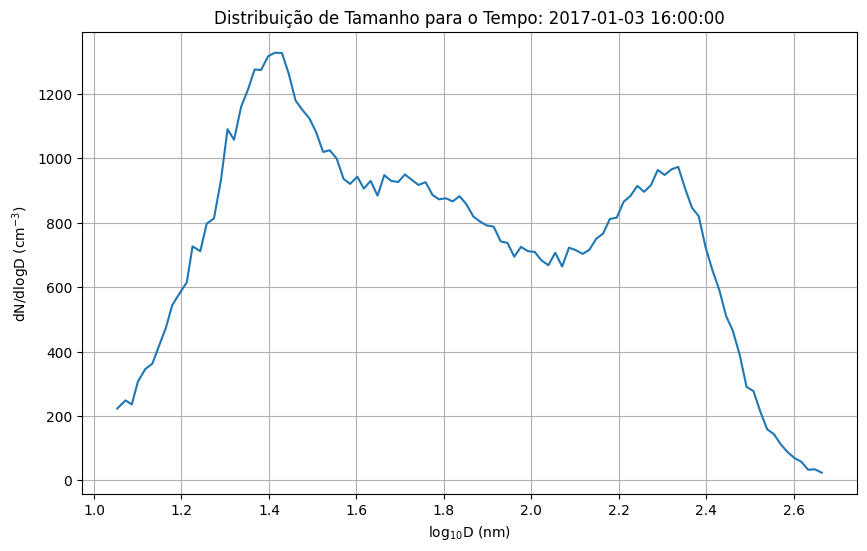

In [ ]:
# Exemplo de distribuição de tamanho, com eixo x em escala log
def plot_distribution(linha):
    data_slice          = dados.iloc[linha, init:final]
    # Get the columns that were successfully converted to diameters
    diameter_columns    = [col for col in columns if col.startswith('D_')]
    filtered_data_slice = data_slice[diameter_columns]
    valid_indices       = filtered_data_slice.notna()

    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(np.array(diameters)[valid_indices]), filtered_data_slice[valid_indices])
    plt.xlabel('log$_{10}$D (nm)')
    plt.ylabel('dN/dlogD (cm$^{-3}$)')
    plt.title(f'Distribuição de Tamanho para o Tempo: {dados_semi_limpo.index[linha]}')
    plt.grid(True)
    plt.show()

linha = 1 # a linha que será plotada
plot_distribution(linha)

In [ ]:
# Verifica se há dados faltantes
dados_semi_limpo.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7040 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 128 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       7040 non-null   float64
 1    N_CN_CPC_STP        7040 non-null   float64
 2    Qc_CPC_SMPS         7040 non-null   float64
 3    Qc_ACSM_SMPS        7040 non-null   float64
 4    Qc_Neph_SMPS        7040 non-null   float64
 5    D_9_14              0 non-null      float64
 6    D_9_47              0 non-null      float64
 7    D_9_82              0 non-null      float64
 8    D_10_2              0 non-null      float64
 9    D_10_6              3237 non-null   float64
 10   D_10_9              4731 non-null   float64
 11   D_11_3              7040 non-null   float64
 12   D_11_8              7040 non-null   float64
 13   D_12_2              7040 non-null   float64
 14   D_12_6              7040 non-null   float64
 15   

In [ ]:
dlogD = []
dlogD = [np.log10(diameters[0]/9)]
for i in range(1, len(diameters)):
    dlogD.append(np.log10(diameters[i]/diameters[i-1]))
dlogD = np.array(dlogD)
print(len(dlogD))

113


In [ ]:
dados.iloc[:, init:final].columns

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# (cálculo apenas para conferência, equivale aproximadamente à coluna N_CN_SMPS_STP)
parametros                  = pd.DataFrame()
parametros['N_CN_SMPS_STP'] = dados['N_CN_SMPS_STP']

# Concentração total = soma(dN_i*dlogD_i)
total_conc                = (dados.iloc[:, init:final] * dlogD).sum(axis=1)
parametros['total_conc']  = total_conc

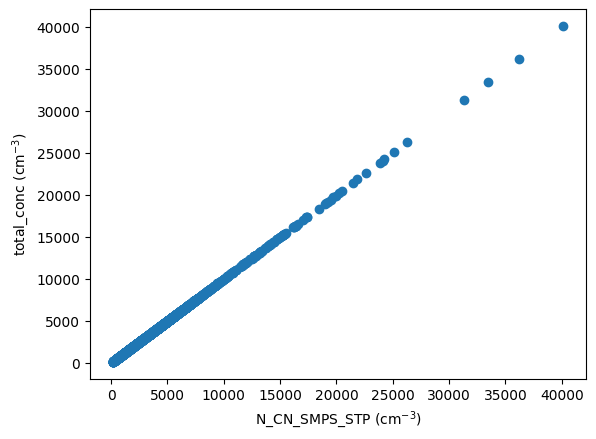

In [ ]:
plt.scatter(parametros['N_CN_SMPS_STP'], parametros['total_conc'])
plt.xlabel('N_CN_SMPS_STP (cm$^{-3}$)')
plt.ylabel('total_conc (cm$^{-3}$)')
plt.show()

In [ ]:
# Diâmetro geométrico médio de cada distribuição de tamanho
# Equivale à média geométrica ponderada pelas concentrações
diam_geom_medio               = (dados.iloc[:, init:final] * dlogD * np.log10(diameters)).sum(axis=1)
diam_geom_medio               = 10**(diam_geom_medio/parametros['N_CN_SMPS_STP'].astype(float)) # acrescentei o astype(float) para lidar con str's e NaN's
parametros['diam_geom_medio'] = diam_geom_medio
display(parametros)

,N_CN_SMPS_STP,total_conc,diam_geom_medio
Start_date,,,
2017-01-03 15:00:00,926.14,926.291126,68.850205
2017-01-03 16:00:00,1210.43,1210.419155,60.148987
2017-01-03 17:00:00,1453.54,1453.832969,55.133531
2017-01-03 18:00:00,1818.92,1819.771529,49.703442
2017-01-03 19:00:00,2062.81,2063.131372,45.432405
...,...,...,...
2023-04-21 17:00:00,2387.56,2386.235931,37.824548
2023-04-21 18:00:00,4060.52,4059.387048,28.642972
2023-04-21 19:00:00,3605.75,3602.422073,27.028160


In [ ]:
# Concentração de partículas com diâmetro <50nm, <100nm e >50nm, >100nm

# Seleciona as colunas cujo diâmetro é menor ou igual a 50nm
diameter_mask             = np.array(diameters) <= 50
sel_columns               = dados.columns[init:final][diameter_mask]
parametros['conc D<50']   = (dados[sel_columns] * dlogD[diameter_mask]).sum(axis=1)

# Seleciona as colunas cujo diâmetro é maior ou igual a 100nm
diameter_mask_p100        = np.array(diameters) >= 100
sel_columns_p100          = dados.columns[init:final][diameter_mask_p100]
parametros['conc D>100']  = (dados[sel_columns_p100] * dlogD[diameter_mask_p100]).sum(axis=1)

parametros.drop('total_conc', axis=1, inplace=True)
parametros.head()

,N_CN_SMPS_STP,diam_geom_medio,conc D<50,conc D>100
Start_date,,,,
2017-01-03 15:00:00,926.14,68.850205,350.450953,351.245586
2017-01-03 16:00:00,1210.43,60.148987,570.999318,393.123466
2017-01-03 17:00:00,1453.54,55.133531,788.130891,424.054258
2017-01-03 18:00:00,1818.92,49.703442,1120.621235,422.987506
2017-01-03 19:00:00,2062.81,45.432405,1372.343703,382.339718


In [ ]:
# Volume (um3/cm3) e Área Superficial (um2/cm3)
# Assume que as partículas são esféricas
parametros['area']  = 1E-06*np.pi*(dados.iloc[:, init:final] * dlogD * (diameters**2)).sum(axis=1)
parametros['vol']   = 1E-09*(np.pi/6)*(dados.iloc[:, init:final] * dlogD * (diameters**3)).sum(axis=1)

parametros.head()

,N_CN_SMPS_STP,diam_geom_medio,conc D<50,conc D>100,area,vol
Start_date,,,,,,
2017-01-03 15:00:00,926.14,68.850205,350.450953,351.245586,49.322915,1.804501
2017-01-03 16:00:00,1210.43,60.148987,570.999318,393.123466,56.184538,2.062855
2017-01-03 17:00:00,1453.54,55.133531,788.130891,424.054258,57.515800,2.024108
2017-01-03 18:00:00,1818.92,49.703442,1120.621235,422.987506,58.123241,1.977726
2017-01-03 19:00:00,2062.81,45.432405,1372.343703,382.339718,54.902840,1.828336


In [ ]:
# Impõe NaN nas linhas em que 'N_CN_SMPS_STP'==NaN
nan_mask                                      = parametros['N_CN_SMPS_STP'].isnull()
columns_to_replace                            = ['diam_geom_medio', 'conc D<50', 'conc D>100', 'area', 'vol']
parametros.loc[nan_mask, columns_to_replace]  = np.nan

## Plots

In [ ]:
parametros.index = pd.to_datetime(parametros.index)

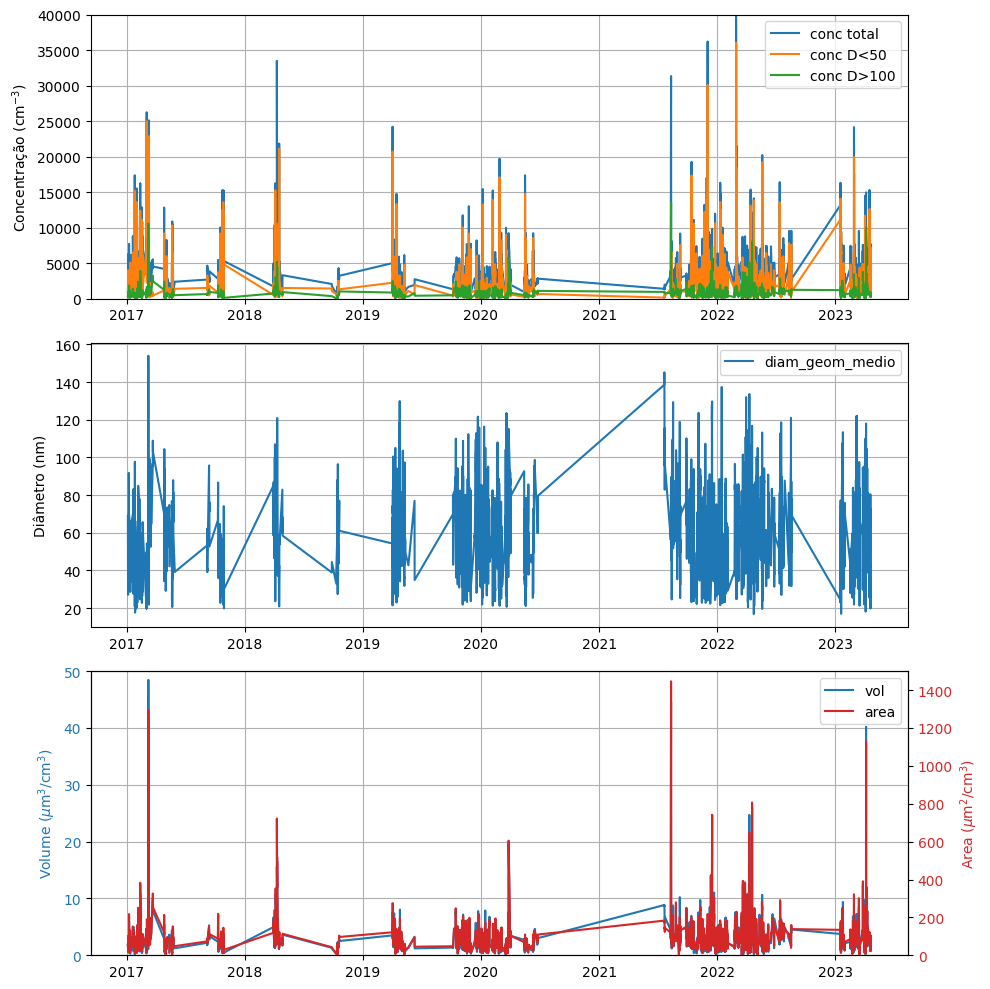

********************
Tempo de execução: 0.68 segundos
********************


In [ ]:
# Séries temporais
t0 = time.time()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10)) # Adjusted figsize for better readability

ax[0].plot(parametros.index, parametros['N_CN_SMPS_STP'], label='conc total')
ax[0].plot(parametros.index, parametros['conc D<50'], label='conc D<50')
ax[0].plot(parametros.index, parametros['conc D>100'], label='conc D>100')
ax[0].set_ylabel('Concentração (cm$^{-3}$)')
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylim(0, 40000)

ax[1].plot(parametros.index, parametros['diam_geom_medio'], label='diam_geom_medio')
ax[1].set_ylabel('Diâmetro (nm)')
ax[1].legend()
ax[1].grid(True)

# Plotting vol on the primary y-axis of the third subplot
ax[2].plot(parametros.index, parametros['vol'], label='vol', color='tab:blue')
ax[2].set_ylabel(r'Volume ($\mu$m$^3$/cm$^3$)', color='tab:blue')
ax[2].tick_params(axis='y', labelcolor='tab:blue')
ax[2].grid(True)
ax[2].set_ylim(0, 50)

# Creating a secondary y-axis for the third subplot
ax3 = ax[2].twinx()
ax3.plot(parametros.index, parametros['area'], label='area', color='tab:red')
ax3.set_ylabel(r'Area ($\mu$m$^2$/cm$^3$)', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.set_ylim(0, 1500)

# Combine legends from both axes
lines, labels   = ax[2].get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()
tf = time.time()
print('*'*20)
print(f"Tempo de execução: {tf-t0:.2f} segundos")
print('*'*20)

In [ ]:
# Find rows where N_CN_SMPS_STP > 50000
high_concentration_rows = dados[dados['N_CN_SMPS_STP'] > 50000]
print(f'Dados com alta concentração: {len(high_concentration_rows)}')
# Iterate through the high concentration rows and plot the size distribution
if len(high_concentration_rows) != 0:
  for index, row in high_concentration_rows.iterrows():
      data_slice = row.iloc[init:final]
      # Get the columns that were successfully converted to diameters
      diameter_columns = [col for col in dados.columns[init:final] if col.startswith('D_')]

      # Filter the data slice and diameters based on these columns
      filtered_data_slice = data_slice[diameter_columns]
      filtered_diameters  = [float(col[2:].replace('_', '.')) for col in diameter_columns]

      valid_indices       = filtered_data_slice.notna()

      plt.figure(figsize=(5,3))
      plt.plot(np.log10(np.array(filtered_diameters)[valid_indices]), filtered_data_slice[valid_indices])
      plt.xlabel('log$_{10}$D (nm)')
      plt.ylabel('dN/dlogD (cm$^{-3}$)')
      plt.title(f'{index} - conc total: {row["N_CN_SMPS_STP"]:.0f}')
      plt.grid(True)
      plt.show()
else:
  print('Não há dados com alta concentração. Nada para mostrar aqui...')

Dados com alta concentração: 0
Não há dados com alta concentração. Nada para mostrar aqui...


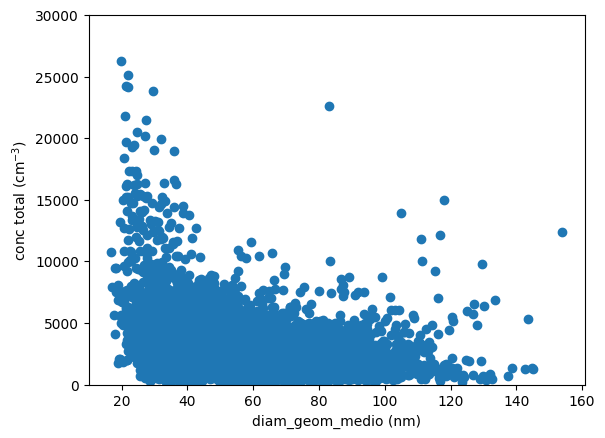

In [ ]:
plt.scatter(parametros['diam_geom_medio'], parametros['N_CN_SMPS_STP'])
plt.ylabel('conc total (cm$^{-3}$)')
plt.xlabel('diam_geom_medio (nm)')
plt.ylim(0, 30000)
plt.show()

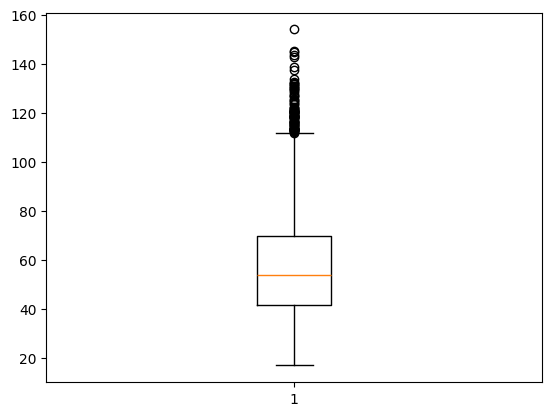

In [ ]:
plt.boxplot(parametros['diam_geom_medio']);

In [ ]:
parametros['diam_geom_medio'].sort_values(ascending=False).head(10)

,diam_geom_medio
Start_date,
2017-03-07 22:00:00,153.947564
2021-07-21 21:00:00,145.133940
2021-07-21 19:00:00,144.680160
2017-03-07 21:00:00,143.528864
2021-07-21 20:00:00,142.611973
2021-07-21 18:00:00,138.575793
2022-01-15 08:00:00,137.367504
2022-04-10 20:00:00,133.646338
2022-01-15 07:00:00,132.547688


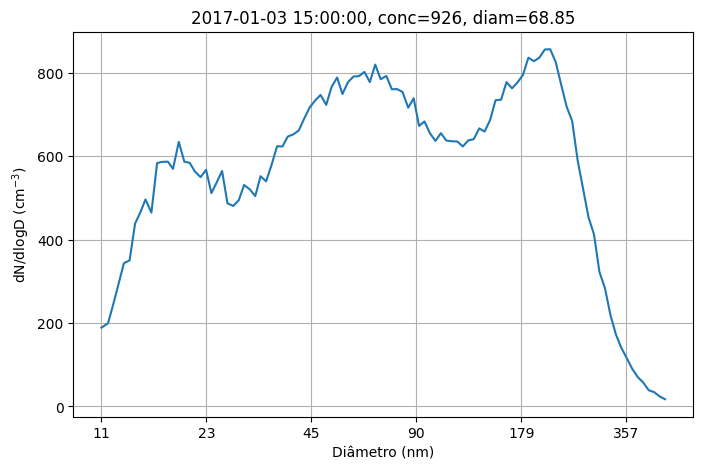

In [ ]:
# Exemplo de distribuição de tamanho, com eixo x em escala log
def plot_distribution(linha):
    data_slice = dados.iloc[linha, init:final]
    # Get the columns that were successfully converted to diameters
    diameter_columns    = [col for col in dados.columns[init:final] if col.startswith('D_')]
    filtered_data_slice = data_slice[diameter_columns]
    valid_indices       = filtered_data_slice.notna()

    # Get the corresponding parameters
    n_cn_smps_stp   = parametros.iloc[linha]['N_CN_SMPS_STP']
    diam_geom_medio = parametros.iloc[linha]['diam_geom_medio']

    plt.figure(figsize=(8, 5))
    plt.plot(np.log10(np.array(diameters)[valid_indices]), filtered_data_slice[valid_indices])
    plt.xlabel('Diâmetro (nm)') # Change x-label to indicate actual diameter
    plt.ylabel('dN/dlogD (cm$^{-3}$)')
    plt.title(f'{dados.index[linha]}, conc={n_cn_smps_stp:.0f}, diam={diam_geom_medio:.2f}')
    plt.grid(True)

    # Set custom x-ticks and labels
    log_diameters_valid = np.log10(np.array(diameters)[valid_indices])
    tick_log_locations  = np.arange(log_diameters_valid.min(), log_diameters_valid.max(), 0.3)
    tick_locations      = 10**tick_log_locations
    tick_labels         = [f'{d:.0f}' for d in tick_locations] # Format labels as integers
    plt.xticks(tick_log_locations, tick_labels)

    plt.show()

linha = 0
plot_distribution(linha)

In [ ]:
dados.columns, parametros.columns

(Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
        'Qc_Neph_SMPS', 'D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6',
        ...
        'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
        'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
        'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP', 'soma_Qc'],
       dtype='object', length=128),
 Index(['N_CN_SMPS_STP', 'diam_geom_medio', 'conc D<50', 'conc D>100', 'area',
        'vol'],
       dtype='object'))

In [ ]:
dados_trat = pd.concat([dados, parametros.drop(columns=['N_CN_SMPS_STP'])], axis=1)
dados_trat.head()

,N_CN_SMPS_STP,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,D_9_47,D_9_82,D_10_2,D_10_6,...,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc,diam_geom_medio,conc D<50,conc D>100,area,vol
Start_date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,926.14,1208.14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0126,1.2227,1.9492,1.0954,0.0,68.850205,350.450953,351.245586,49.322915,1.804501
2017-01-03 16:00:00,1210.43,1558.35,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0191,1.1410,2.2364,1.3200,0.0,60.148987,570.999318,393.123466,56.184538,2.062855
2017-01-03 17:00:00,1453.54,1839.43,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0023,1.0257,2.3834,1.0674,0.0,55.133531,788.130891,424.054258,57.515800,2.024108
2017-01-03 18:00:00,1818.92,2313.23,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0063,0.8801,1.9003,1.0288,0.0,49.703442,1120.621235,422.987506,58.123241,1.977726
2017-01-03 19:00:00,2062.81,2604.68,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0116,0.7989,1.9514,1.0285,0.0,45.432405,1372.343703,382.339718,54.902840,1.828336


## Continuando...

A parte com os dados previamente tratados foi feita na seção anterior e salvo em um arquivo de acesso livre. Podemos continuar as análises a partir deste ponto. Na célula abaixo importo esse arquivo para o ambiente de trabalho do notebook.

In [ ]:
'''files = {
    'SGP_smps_acsm_hour_all_treated.csv': '1A---qGBPSOkDYFeyM5BElReabJ2Y8E4k'
}


# Carregar todos os arquivos para a área de trabalho do colab
for filename, file_id in files.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")'''


dados_old2 = dados.copy()
dados = dados_trat.copy()
dados.head()

,N_CN_SMPS_STP,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,D_9_14,D_9_47,D_9_82,D_10_2,D_10_6,...,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc,diam_geom_medio,conc D<50,conc D>100,area,vol
Start_date,,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,926.14,1208.14,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0126,1.2227,1.9492,1.0954,0.0,68.850205,350.450953,351.245586,49.322915,1.804501
2017-01-03 16:00:00,1210.43,1558.35,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0191,1.1410,2.2364,1.3200,0.0,60.148987,570.999318,393.123466,56.184538,2.062855
2017-01-03 17:00:00,1453.54,1839.43,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0023,1.0257,2.3834,1.0674,0.0,55.133531,788.130891,424.054258,57.515800,2.024108
2017-01-03 18:00:00,1818.92,2313.23,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0063,0.8801,1.9003,1.0288,0.0,49.703442,1120.621235,422.987506,58.123241,1.977726
2017-01-03 19:00:00,2062.81,2604.68,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0116,0.7989,1.9514,1.0285,0.0,45.432405,1372.343703,382.339718,54.902840,1.828336


In [ ]:
final = -15
dados.columns[init:final]

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# Dropando as colunas individuais de cada diâmetros

dados       = dados.drop(columns=dados.columns[init:final])
dados_trat  = dados_trat.drop(columns=dados_trat.columns[init:final])
dados.columns # só checando

Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
       'Qc_Neph_SMPS', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP',
       'Mass_BC_PSAP_STP', 'Mass_SMPS_STP', 'Mass_ammonium_STP',
       'Mass_chloride_STP', 'Mass_nitrate_STP', 'Mass_organics_STP',
       'Mass_sulfate_STP', 'soma_Qc', 'diam_geom_medio', 'conc D<50',
       'conc D>100', 'area', 'vol'],
      dtype='object')

In [ ]:
dados.head()

,N_CN_SMPS_STP,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc,diam_geom_medio,conc D<50,conc D>100,area,vol
Start_date,,,,,,,,,,,,,,,,,,,,
2017-01-03 15:00:00,926.14,1208.14,0.0,0.0,0.0,5.0451,4.9781,0.0670,2.7641,0.6983,0.0126,1.2227,1.9492,1.0954,0.0,68.850205,350.450953,351.245586,49.322915,1.804501
2017-01-03 16:00:00,1210.43,1558.35,0.0,0.0,0.0,5.3641,5.2933,0.0709,3.1234,0.5768,0.0191,1.1410,2.2364,1.3200,0.0,60.148987,570.999318,393.123466,56.184538,2.062855
2017-01-03 17:00:00,1453.54,1839.43,0.0,0.0,0.0,5.4724,5.4008,0.0716,3.0425,0.9220,0.0023,1.0257,2.3834,1.0674,0.0,55.133531,788.130891,424.054258,57.515800,2.024108
2017-01-03 18:00:00,1818.92,2313.23,0.0,0.0,0.0,4.3680,4.2983,0.0697,2.9643,0.4827,0.0063,0.8801,1.9003,1.0288,0.0,49.703442,1120.621235,422.987506,58.123241,1.977726
2017-01-03 19:00:00,2062.81,2604.68,0.0,0.0,0.0,4.3164,4.2466,0.0698,2.7191,0.4563,0.0116,0.7989,1.9514,1.0285,0.0,45.432405,1372.343703,382.339718,54.902840,1.828336


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7040 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N_CN_SMPS_STP       7040 non-null   float64
 1   N_CN_CPC_STP        7040 non-null   float64
 2   Qc_CPC_SMPS         7040 non-null   float64
 3   Qc_ACSM_SMPS        7040 non-null   float64
 4   Qc_Neph_SMPS        7040 non-null   float64
 5   Mass_ACSM_PSAP_STP  7040 non-null   float64
 6   Mass_ACSM_STP       7040 non-null   float64
 7   Mass_BC_PSAP_STP    7040 non-null   float64
 8   Mass_SMPS_STP       7040 non-null   float64
 9   Mass_ammonium_STP   7040 non-null   float64
 10  Mass_chloride_STP   7040 non-null   float64
 11  Mass_nitrate_STP    7040 non-null   float64
 12  Mass_organics_STP   7040 non-null   float64
 13  Mass_sulfate_STP    7040 non-null   float64
 14  soma_Qc             7040 non-null   float64
 15  diam_geom_medio    

Temos ainda um conjunto de dados com 7040 entradas e sem NaNs.

In [ ]:
## Só checando antes o número de casos completos (linha inteira com dados, mesmo fora das colunas de interesse)

linhas_completas = dados.dropna()

print(f"Número de linhas com todas as variáveis: {len(linhas_completas)}")
print(f"Número linhas com dados faltantes: {len(dados) - len(linhas_completas)}")
print(f"Parcela de linhas com todas as variáveis: {len(linhas_completas) / len(dados) * 100:.2f}%")

Número de linhas com todas as variáveis: 7040
Número linhas com dados faltantes: 0
Parcela de linhas com todas as variáveis: 100.00%


Tudo completo!

old: *São 450 linhas com dados faltantes (< 459 porque tem linhas com mais de um NaN). Podemos decidir depois o que fazer, mas, novamente, são principalmente parâmetros referentes à qualidade de uma medição, são mais importantes para identificar outliers. De todo modo, se decidirmos dropar essas linhas, ainda teremos 7767 linhas, ainda bem significativo.*

Código para baixar esse arquivo: 1tgNLU_xRvWCa4PuCbhG4wZ3PKBy2iO6J

Se preferirem o link: https://drive.google.com/file/d/1tgNLU_xRvWCa4PuCbhG4wZ3PKBy2iO6J/view?usp=drive_link

## Verificação da distribuição dos dados por ano e mês

Aplicamos muitos cortes e com isso excluímos um volume grande de dados. É interessante checar como esses dados estão distribuídos ao longo dos anos e meses para nos certificarmos que não estamos tratando dados tendenciosos.

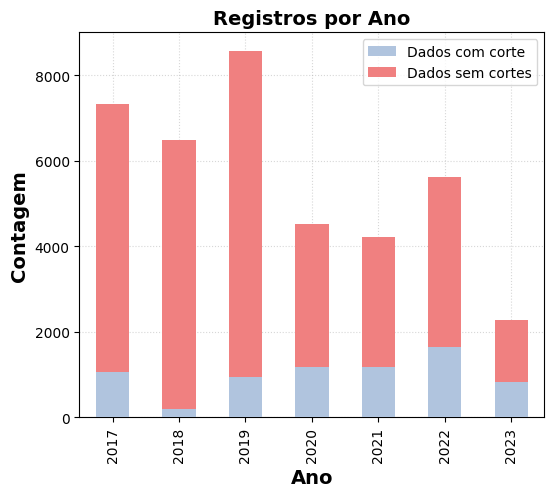

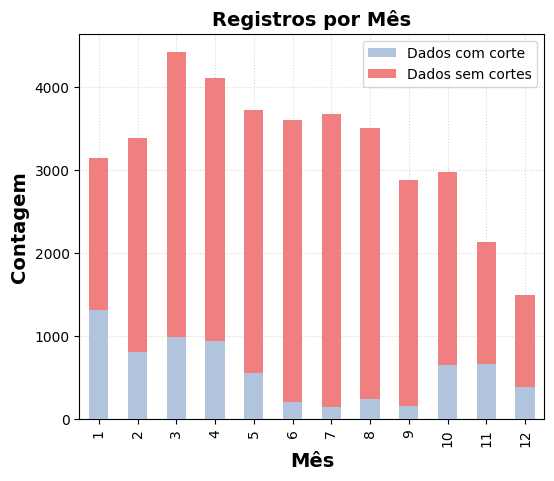

In [ ]:
datas       = pd.to_datetime(dados.index) # só para ter as datas com acesso mais fácil
datas_old   = pd.to_datetime(dados_old.index)

contagem_ano      = datas.year.value_counts().sort_index()
contagem_ano_old  = datas_old.year.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_ano.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_ano_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Ano', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Ano', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_year_-_qc_sum.png', dpi=150)
plt.show()

contagem_mes      = datas.month.value_counts().sort_index()
contagem_mes_old  = datas_old.month.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_mes.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_mes_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Mês', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Mês', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_month_-_qc_sum.png', dpi=150)
plt.show()


De fato, a penalização no ano de 2018 e nos meses de junho a outubro foi bem grande com esses cortes.

Na distribuição por ano, podemos ver que carecemos mais dos dados de 2018, mas talvez não chegue a ser um problema porque a distribuição para os demais anos é razoavelmente equivalente.

A distribuição dos meses que chama um pouco a atenção, uma vez que o período que compreende os meses de junho a setembro apresenta uma baixa.

Por ora, seguiremos assim, mas pode ser interessante retornar a este ponto mais tarde para buscar uma harmonização entre as distribuições de dados nos anos e meses.

# Parte final do condicionamento dos dados


Agora que já estudamos um pouco do comportamento dos preditores, vamos acrescentar o alvo ao nosso trabalho. A princípio, deseja-se, como proposto inicialmente, estudar a grandeza intrínseca "eficiência de espalhamento", que é obtida pela razão do espalhamento com a massa total da amostra. Deseja-se estudá-la em detrimento da grandeza extrínseca "espalhamento" porque acredita-se que esta pode apresentar resultados bons sem muito ganho de informação: com o crescimento da massa, esperamos mesmo que haja mais espalhamento. A ideia é estudar outros aspectos desse fenêmeno.

Vamos começar organizando novamente após a importação.

In [ ]:
files_neph = {
    'SGP_neph_hour_2017.csv': '1tmNTeNHgcXyIy_j8ruqNMrxJTRFahJrO',
    'SGP_neph_hour_2018.csv': '1H_oDs0-tUYY4Y-Q9ZW1bZliS2uW5IEQZ',
    'SGP_neph_hour_2019.csv': '1EYCCugHCN5urtmZqq2Ppzlr3VYgGTGqR',
    'SGP_neph_hour_2020.csv': '1OTHPj-8ZJ4dIcOnYMT655pLAiDpTSJrU',
    'SGP_neph_hour_2021.csv': '19QWf6Pg16glAPUpxZ8a5RKYYnZatNXmF',
    'SGP_neph_hour_2022.csv': '1UFsn2FLz_Rv3q1JqM4muNaV0dV9iihTm',
    'SGP_neph_hour_2023.csv': '1896cg345Ih4XzKriiGVITwoUnD4gXmmD'
}

In [ ]:
for filename, file_id in files_neph.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")

Baixando SGP_neph_hour_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1tmNTeNHgcXyIy_j8ruqNMrxJTRFahJrO
To: /content/SGP_neph_hour_2017.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 7.38MB/s]


SGP_neph_hour_2017.csv carregado com sucesso!
Baixando SGP_neph_hour_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1H_oDs0-tUYY4Y-Q9ZW1bZliS2uW5IEQZ
To: /content/SGP_neph_hour_2018.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 7.13MB/s]


SGP_neph_hour_2018.csv carregado com sucesso!
Baixando SGP_neph_hour_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=1EYCCugHCN5urtmZqq2Ppzlr3VYgGTGqR
To: /content/SGP_neph_hour_2019.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 13.4MB/s]


SGP_neph_hour_2019.csv carregado com sucesso!
Baixando SGP_neph_hour_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1OTHPj-8ZJ4dIcOnYMT655pLAiDpTSJrU
To: /content/SGP_neph_hour_2020.csv
100%|██████████| 1.80M/1.80M [00:00<00:00, 12.3MB/s]


SGP_neph_hour_2020.csv carregado com sucesso!
Baixando SGP_neph_hour_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=19QWf6Pg16glAPUpxZ8a5RKYYnZatNXmF
To: /content/SGP_neph_hour_2021.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 13.5MB/s]


SGP_neph_hour_2021.csv carregado com sucesso!
Baixando SGP_neph_hour_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1UFsn2FLz_Rv3q1JqM4muNaV0dV9iihTm
To: /content/SGP_neph_hour_2022.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 11.2MB/s]


SGP_neph_hour_2022.csv carregado com sucesso!
Baixando SGP_neph_hour_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1896cg345Ih4XzKriiGVITwoUnD4gXmmD
To: /content/SGP_neph_hour_2023.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 12.2MB/s]

SGP_neph_hour_2023.csv carregado com sucesso!


In [ ]:
# Aqui, importamos novamente
SGP_neph_hour_2017 = pd.read_csv('SGP_neph_hour_2017.csv')
SGP_neph_hour_2018 = pd.read_csv('SGP_neph_hour_2018.csv')
SGP_neph_hour_2019 = pd.read_csv('SGP_neph_hour_2019.csv')
SGP_neph_hour_2020 = pd.read_csv('SGP_neph_hour_2020.csv')
SGP_neph_hour_2021 = pd.read_csv('SGP_neph_hour_2021.csv')
SGP_neph_hour_2022 = pd.read_csv('SGP_neph_hour_2022.csv')
SGP_neph_hour_2023 = pd.read_csv('SGP_neph_hour_2023.csv')

In [ ]:
# Juntando em um só
SGP_neph_hour_all = pd.concat([SGP_neph_hour_2017, SGP_neph_hour_2018, SGP_neph_hour_2019, SGP_neph_hour_2020, SGP_neph_hour_2021, SGP_neph_hour_2022, SGP_neph_hour_2023])
SGP_neph_alvo     = SGP_neph_hour_all.loc[:,['Start_date','BsG1_STP']]

In [ ]:
# Para transformar a coluna de data em índice
SGP_neph_alvo['Start_date'] = pd.to_datetime(SGP_neph_alvo['Start_date'])
SGP_neph_alvo.set_index('Start_date', inplace=True)
SGP_neph_alvo.head()

,BsG1_STP
Start_date,
2017-01-01 00:00:00,NaN
2017-01-01 01:00:00,NaN
2017-01-01 02:00:00,NaN
2017-01-01 03:00:00,NaN
2017-01-01 04:00:00,NaN


In [ ]:
# Organizando o formato dos dados
SGP_neph_alvo['BsG1_STP'] = pd.to_numeric(SGP_neph_alvo['BsG1_STP'], errors='coerce')
SGP_neph_alvo.dropna(subset=['BsG1_STP'], inplace=True)

In [ ]:
# Organizando o formato dos dados
SGP_neph_alvo['Start_date']  = pd.to_datetime(SGP_neph_alvo.index)
dados['Start_date']          = pd.to_datetime(dados_trat.index)

In [ ]:
# Redefinindo índices
SGP_neph_alvo.index = SGP_neph_alvo['Start_date']
dados.index         = dados['Start_date']

In [ ]:
# Juntando neph_subset e dados e dropando o que não será utilizado
dados_neph_merged = pd.merge(dados_trat, SGP_neph_alvo, left_index=True, right_index=True, how='inner')
dados_neph_merged = dados_neph_merged.drop(columns=['Start_date', 'Start_date'])
# Removendo linhas com Mass_ACSM_PSAP_STP <= 0
dados_neph_merged = dados_neph_merged[dados_neph_merged['Mass_ACSM_PSAP_STP'] > 0]

In [ ]:
# Para visualizar
dados_neph_merged.describe()

,N_CN_SMPS_STP,N_CN_CPC_STP,Qc_CPC_SMPS,Qc_ACSM_SMPS,Qc_Neph_SMPS,Mass_ACSM_PSAP_STP,Mass_ACSM_STP,Mass_BC_PSAP_STP,Mass_SMPS_STP,Mass_ammonium_STP,...,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,soma_Qc,diam_geom_medio,conc D<50,conc D>100,area,vol,BsG1_STP
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,3221.563607,4078.408392,0.029287,0.221855,0.092111,4.138751,4.018781,0.119969,3.480401,0.435445,...,0.776374,2.201646,0.594844,0.343253,55.955828,1785.081587,635.606317,79.646935,2.429169,11.048858
std,2466.712280,3584.380091,0.168622,0.415527,0.289206,3.476922,3.446385,0.109069,2.955722,0.413955,...,1.006159,2.458762,0.564755,0.474832,20.182649,2039.763297,567.553775,62.194724,2.155111,11.612198
min,133.320000,145.340000,0.000000,0.000000,0.000000,0.079000,0.021700,-0.003000,0.086900,-0.349400,...,-0.024700,-0.199100,-0.089100,0.000000,16.868160,36.520644,17.341559,2.638695,0.061856,-0.560000
25%,1686.175000,2017.620000,0.000000,0.000000,0.000000,2.008400,1.922350,0.050100,1.683550,0.178450,...,0.165850,0.900800,0.246750,0.000000,41.132292,647.332713,306.488114,43.282202,1.172524,4.590000
50%,2773.410000,3331.870000,0.000000,0.000000,0.000000,3.282600,3.156600,0.090600,2.796100,0.328900,...,0.373900,1.543700,0.427700,0.000000,52.977034,1240.194042,518.665850,67.718788,1.933472,8.170000
75%,4080.445000,4975.815000,0.000000,0.000000,0.000000,5.279200,5.148650,0.162050,4.514500,0.570850,...,0.973200,2.759250,0.740350,1.000000,68.436013,2202.550404,825.293686,102.717670,3.152844,13.595000
max,40148.790000,57213.120000,1.000000,1.000000,1.000000,80.618100,80.138900,2.328700,61.882800,4.300300,...,9.644900,68.365700,6.040300,1.000000,153.947564,36019.149791,13555.246333,1446.380868,48.460781,310.390000


Vamos agora criar uma coluna que guarda o valor da soma das três pontuações de *quality check* referentes às características utilizadas nos modelos implementados. Utilizaremos os valores nessa coluna para analisar potenciais *outliers*: se um dado estiver muito distante dos demais, ele nos gera desconfiança, e o investigamos utilizando como um dos critérios o *quality check* total. Manteremos apenas *outliers*, selecionados a partir dos dados que estão fora do quantil 0,005, com *quality check* total 0.

In [ ]:
# Cauda esquerda

lista = []
for i in dados_neph_merged.drop(columns = [ 'soma_Qc','N_CN_SMPS_STP','N_CN_SMPS_STP','conc D<50',
                                           'Qc_ACSM_SMPS','N_CN_CPC_STP','Qc_CPC_SMPS','Qc_Neph_SMPS','BsG1_STP','Mass_ACSM_STP','Mass_SMPS_STP']).columns:
  perc = 1
  j = 0.01
  print(i)
  while perc > 0.2:
    j -= 0.002 * perc
    print(j)
    if j < 0.001:
      j = 0.001
      break
    a = dados_neph_merged[dados_neph_merged[i] < dados_neph_merged[i].quantile(j)].loc[:,'soma_Qc'].value_counts()
    perc = a.get(0, 0) / a.sum() if a.sum() > 0 else 0 # Fix: Safely get count for key 0
  dados_neph_merged = dados_neph_merged[dados_neph_merged[i] > dados_neph_merged[i].quantile(j)]
  lista.append([i,j])

Mass_ACSM_PSAP_STP
0.008
Mass_BC_PSAP_STP
0.008
0.0069019607843137255
0.005765597147950089
0.004565597147950089
0.003279882862235803
0.0021370257193786607
0.0008513114336643748
Mass_ammonium_STP
0.008
0.007372549019607843
0.006691697955778056
0.006040535165080381
0.005425150549695766
0.004910864835410051
0.004459251932184245
0.00397649331149459
0.0035149548499561283
0.0029932157195213457
0.0024668999300476615
Mass_chloride_STP
0.008
0.006823529411764706
0.005680672268907563
0.0044806722689075635
0.0032392929585627356
0.0020011977204674974
0.0007704284896982666
Mass_nitrate_STP
0.008
Mass_organics_STP
0.008
Mass_sulfate_STP
0.008
0.0074
0.006791304347826087
0.006172256728778468
0.005505590062111801
0.004858531238582389
0.004191864571915722
0.003653403033454184
0.0031316639030194013
diam_geom_medio
0.008
0.00708
0.006216363636363637
0.005395850815850816
0.004631144933497876
0.004010455278325462
0.003370455278325462
0.002799026706896891
0.0021323600402302243
0.001560931468801653
0.0009609

In [ ]:
# Cauda direita

lista = []
for i in dados_neph_merged.drop(columns = [ 'soma_Qc','N_CN_SMPS_STP','N_CN_SMPS_STP','conc D<50',
                                           'Qc_ACSM_SMPS','N_CN_CPC_STP','Qc_CPC_SMPS','Qc_Neph_SMPS','BsG1_STP','Mass_ACSM_STP','Mass_SMPS_STP']).columns:
  perc = 1
  j = 0.98
  print(i)
  while perc > 0.2:
    j += 0.004 * perc
    print(j)
    if j > 0.999:
      j = 0.999
      break
    a = dados_neph_merged[dados_neph_merged[i] > dados_neph_merged[i].quantile(j)].loc[:,'soma_Qc'].value_counts()
    perc = a.get(0, 0) / a.sum() if a.sum() > 0 else 0 # Fix: Safely get count for key 0
  dados_neph_merged = dados_neph_merged[dados_neph_merged[i] < dados_neph_merged[i].quantile(j)]
  lista.append([i,j])

Mass_ACSM_PSAP_STP
0.984
Mass_BC_PSAP_STP
0.984
0.9866526315789473
0.9894374417055296
0.9922310924991804
0.9947528316296151
0.997204444532841
0.9990867974740174
Mass_ammonium_STP
0.984
0.9859368421052631
0.9877199746353836
0.9894733992929179
0.9912511770706957
0.9930204078399264
0.9948299316494502
0.9966363832623535
0.9988363832623535
1.0011220975480677
Mass_chloride_STP
0.984
0.9864421052631579
0.9888421052631579
0.9910845295055821
0.9931614525825052
0.9952102330703101
0.9972791985875514
0.999396845646375
Mass_nitrate_STP
0.984
0.9867368421052631
0.9895573549257759
0.9924605807322275
0.9953939140655609
0.9983939140655609
1.001593914065561
Mass_organics_STP
0.984
0.9854042553191489
0.9868461157842652
0.9882307311688806
0.989659302597452
0.9912986468597471
0.9930678776289779
0.995019097141173
0.9971524304745063
0.9990347834156827
Mass_sulfate_STP
0.984
0.985659574468085
0.9874214792299898
0.9892593170678277
0.9908843170678276
0.9925880207715313
0.994315293498804
0.9960799993811569
0.997

# Estatística e Preparação


Já fizemos um primeiro tratamento dos dados, agora vamos olhar com um pouco mais de detalhes para o que temos para trabalhar. Em seguida, faremos a divisão entre treino e teste e o escalonamento.

In [ ]:
# Volume de dados
dados_sem_outliers.shape

(5659, 12)

Com os cortes de soma_qc >= 1 o conjunto final possui apenas 5659 dados. Talvez já seja muito baixo.

### Verificação da distribuição dos dados por ano e mês (sem outliers)

Aplicamos muitos cortes e com isso excluímos um volume grande de dados. É interessante checar como esses dados estão distribuídos ao longo dos anos e meses para nos certificarmos que não estamos tratando dados tendenciosos.

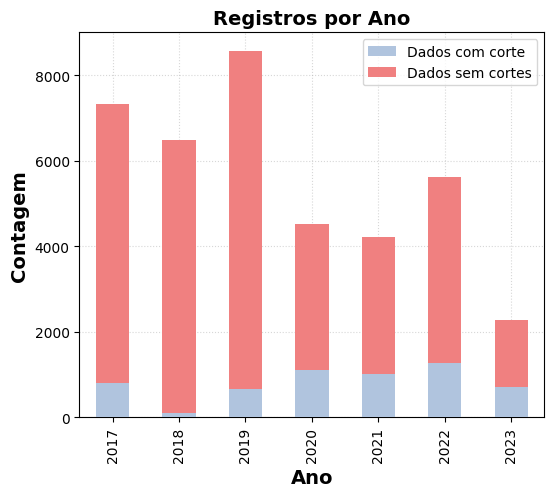

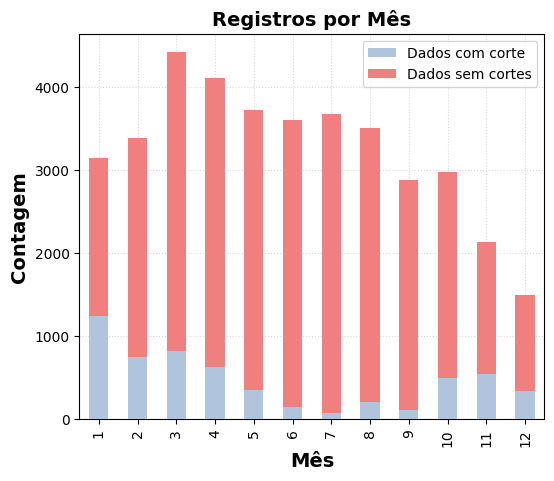

In [ ]:
datas       = pd.to_datetime(dados_sem_outliers.index) # só para ter as datas com acesso mais fácil
datas_old   = pd.to_datetime(dados_old.index)

contagem_ano      = datas.year.value_counts().sort_index()
contagem_ano_old  = datas_old.year.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_ano.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_ano_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Ano', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Ano', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_year_-_qc_sum_wo_outliers.png', dpi=150)
plt.show()

contagem_mes      = datas.month.value_counts().sort_index()
contagem_mes_old  = datas_old.month.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_mes.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_mes_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Mês', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Mês', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_month_-_qc_sum_wo_outliers.png', dpi=150)
plt.show()


De fato, a penalização no ano de 2018 e nos meses de junho a outubro foi bem grande com esses cortes.

Na distribuição por ano, podemos ver que carecemos mais dos dados de 2018, mas talvez não chegue a ser um problema porque a distribuição para os demais anos é razoavelmente equivalente.

A distribuição dos meses que chama um pouco a atenção, uma vez que o período que compreende os meses de junho a setembro apresenta uma baixa.

Por ora, seguiremos assim, mas pode ser interessante retornar a este ponto mais tarde para buscar uma harmonização entre as distribuições de dados nos anos e meses.

In [ ]:
# Verificando o tipo de informação em cada coluna
dados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5659 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass_BC_PSAP_STP   5659 non-null   float64
 1   Mass_ammonium_STP  5659 non-null   float64
 2   Mass_chloride_STP  5659 non-null   float64
 3   Mass_nitrate_STP   5659 non-null   float64
 4   Mass_organics_STP  5659 non-null   float64
 5   Mass_sulfate_STP   5659 non-null   float64
 6   diam_geom_medio    5659 non-null   float64
 7   conc D<50          5659 non-null   float64
 8   conc D>100         5659 non-null   float64
 9   area               5659 non-null   float64
 10  vol                5659 non-null   float64
 11  Scattering_Eff     5659 non-null   float64
dtypes: float64(12)
memory usage: 574.7 KB


In [ ]:
# verificando se há valores faltantes (NaN)
dadosisna = dados_sem_outliers.isna().sum()
dadosisna

,0
Mass_BC_PSAP_STP,0
Mass_ammonium_STP,0
Mass_chloride_STP,0
Mass_nitrate_STP,0
Mass_organics_STP,0
Mass_sulfate_STP,0
diam_geom_medio,0
conc D<50,0
conc D>100,0
area,0


As saídas acima parecem coerentes com o tratamento prévio; os outliers que restaram são em soma_Qc, mas não implicam necessidade de exclusão desses dados, pois não há motivos claros para disconfiança em relação a eles, diferentemente dos dados já excluídos.

In [ ]:
# Estatística descritiva básica
dados_sem_outliers.describe()

,Mass_BC_PSAP_STP,Mass_ammonium_STP,Mass_chloride_STP,Mass_nitrate_STP,Mass_organics_STP,Mass_sulfate_STP,diam_geom_medio,conc D<50,conc D>100,area,vol,Scattering_Eff
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,0.037165,0.107764,0.002010,0.179465,0.522490,0.151105,55.789980,0.497718,0.241814,77.304993,2.318137,2.510138
std,0.035954,0.061179,0.005447,0.136673,0.173688,0.081497,18.752975,0.188518,0.141558,40.567595,1.397366,0.795605
min,0.000985,-0.220109,-0.030028,0.008770,0.092134,0.004975,18.988360,0.084350,0.007710,16.462445,0.450857,0.117509
25%,0.016108,0.063487,-0.000505,0.056134,0.382181,0.092231,41.928135,0.351302,0.126181,45.979204,1.268507,1.947145
50%,0.026869,0.107682,0.001900,0.141237,0.534981,0.135417,53.115010,0.489944,0.218563,69.213070,1.976909,2.421218
75%,0.044801,0.152475,0.004526,0.282391,0.665079,0.194024,68.007119,0.629595,0.338304,101.514092,3.074092,3.015973
max,0.321580,0.532745,0.034410,0.623152,0.941757,0.629101,130.684068,0.962079,0.742413,284.045444,9.693169,4.788225


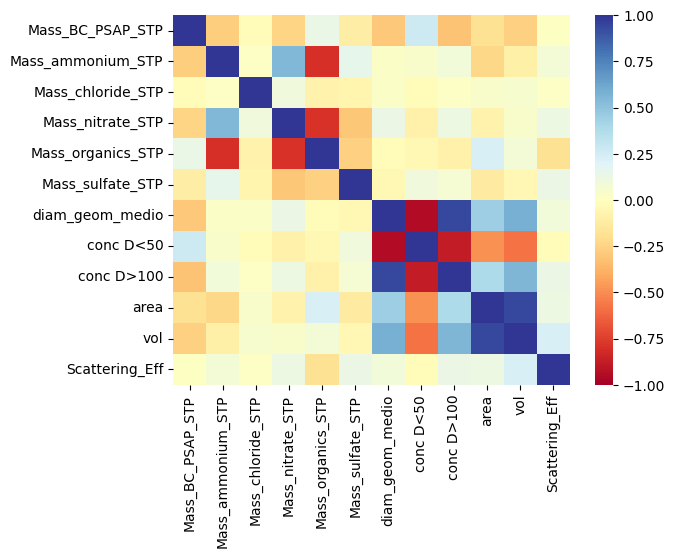

In [ ]:
# Vamos verificar se há correlação com uma matriz de correlação

matriz_corr = dados_sem_outliers.corr().round(2) #Criando a matriz
sns.heatmap(matriz_corr, cmap = 'RdYlBu', vmin=-1, vmax=1); #Fazendo o heatmap

Observam-se correlações entre os preditores. Esse fato será importante no desenvolvimento que segue, pois como tetativa de otimizar a regressão multilinear, por exemplo, serão utilizados apenas os preditores com maior correlação com o alvo dentre cada conjunto de preditores correlacionados.

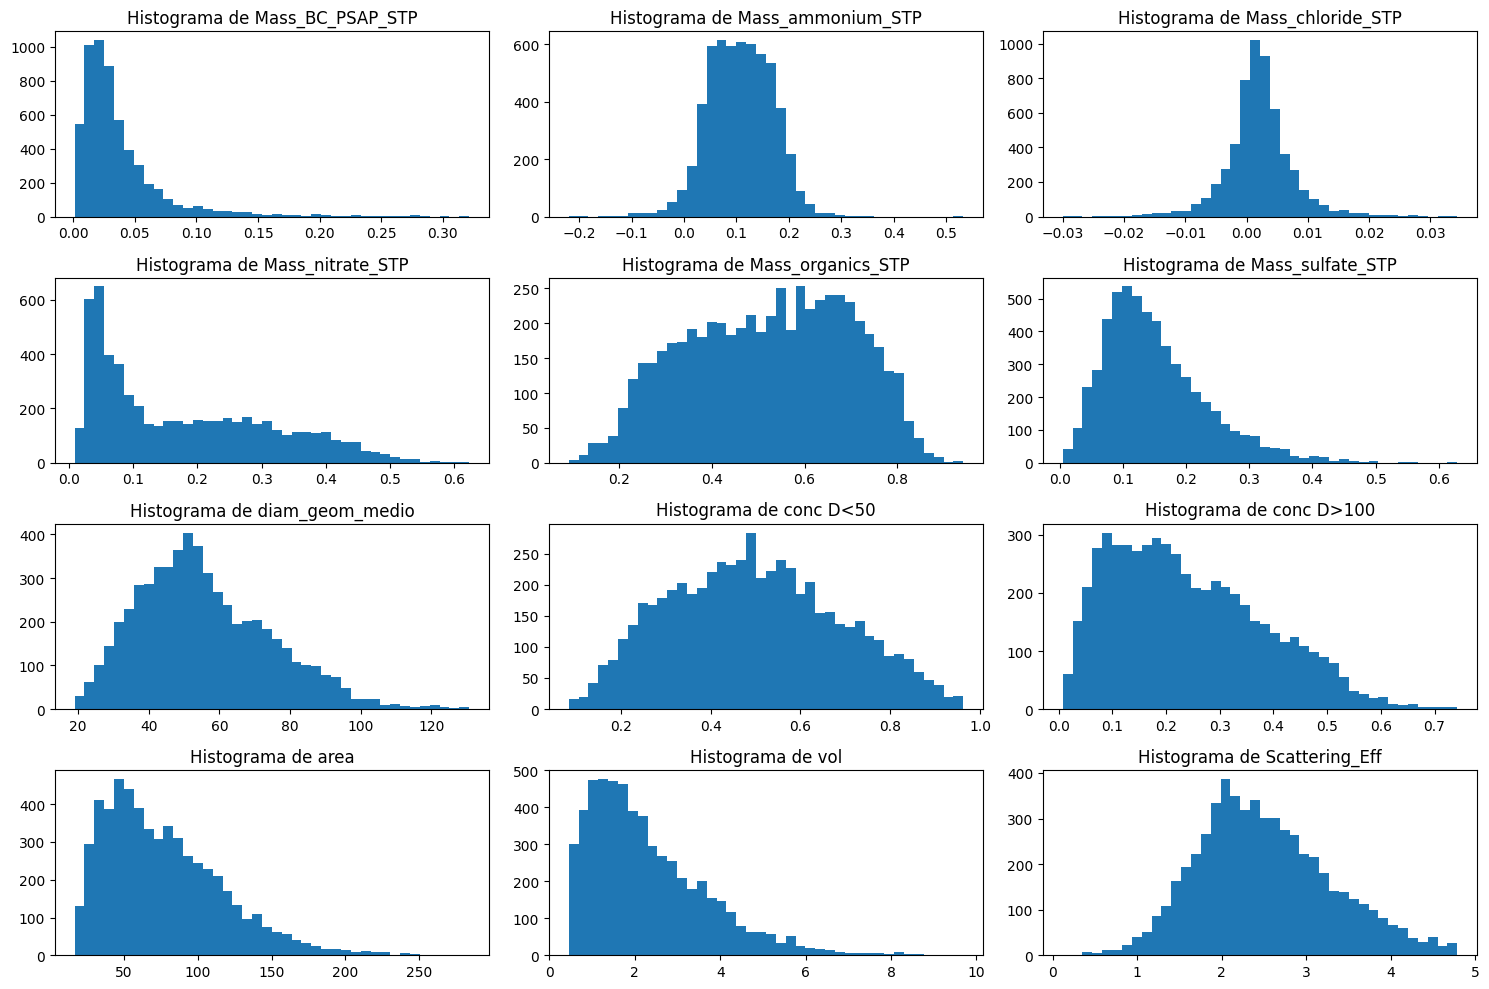

In [ ]:
# Vamos agora fazer os histogramas
# Calculando o número de linhhas necessário com base no número de colunas e colunas por linha
num_cols = len(dados_sem_outliers.columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 2.5)) # Ajustando tamanho da figura

# Criando histogramas em cada posição
clm = 0 # Para pegar as colunas
for i in range(num_rows): # Percorrendo linhas
  for j in range(3): # Percorrendo colunas
    if clm < num_cols: # Para controlar a parada
      colu_clm = dados_sem_outliers.columns[clm] # Pegando os dados da coluna
      axs[i, j].hist(dados_sem_outliers[f'{colu_clm}'], bins=40); # Fazendo o histograma na posição
      axs[i, j].set_title(f'Histograma de {colu_clm}') # Título
      clm += 1 # Próxima coluna
    else:
      axs[i, j].axis('off') # Para não fazer vazio quando acabar


plt.tight_layout() # Para melhorar a visualização
plt.show()

Os histogramas revelam que muitas variáveis não parecem apresentar uma distribuição Gaussiana, informação que será útil ao decidir o tipo de escalonamento a ser realizado.

Em seguida, vamos ver as relações dos preditores com o alvo e olhar com mais cuidado para sua distribuição.

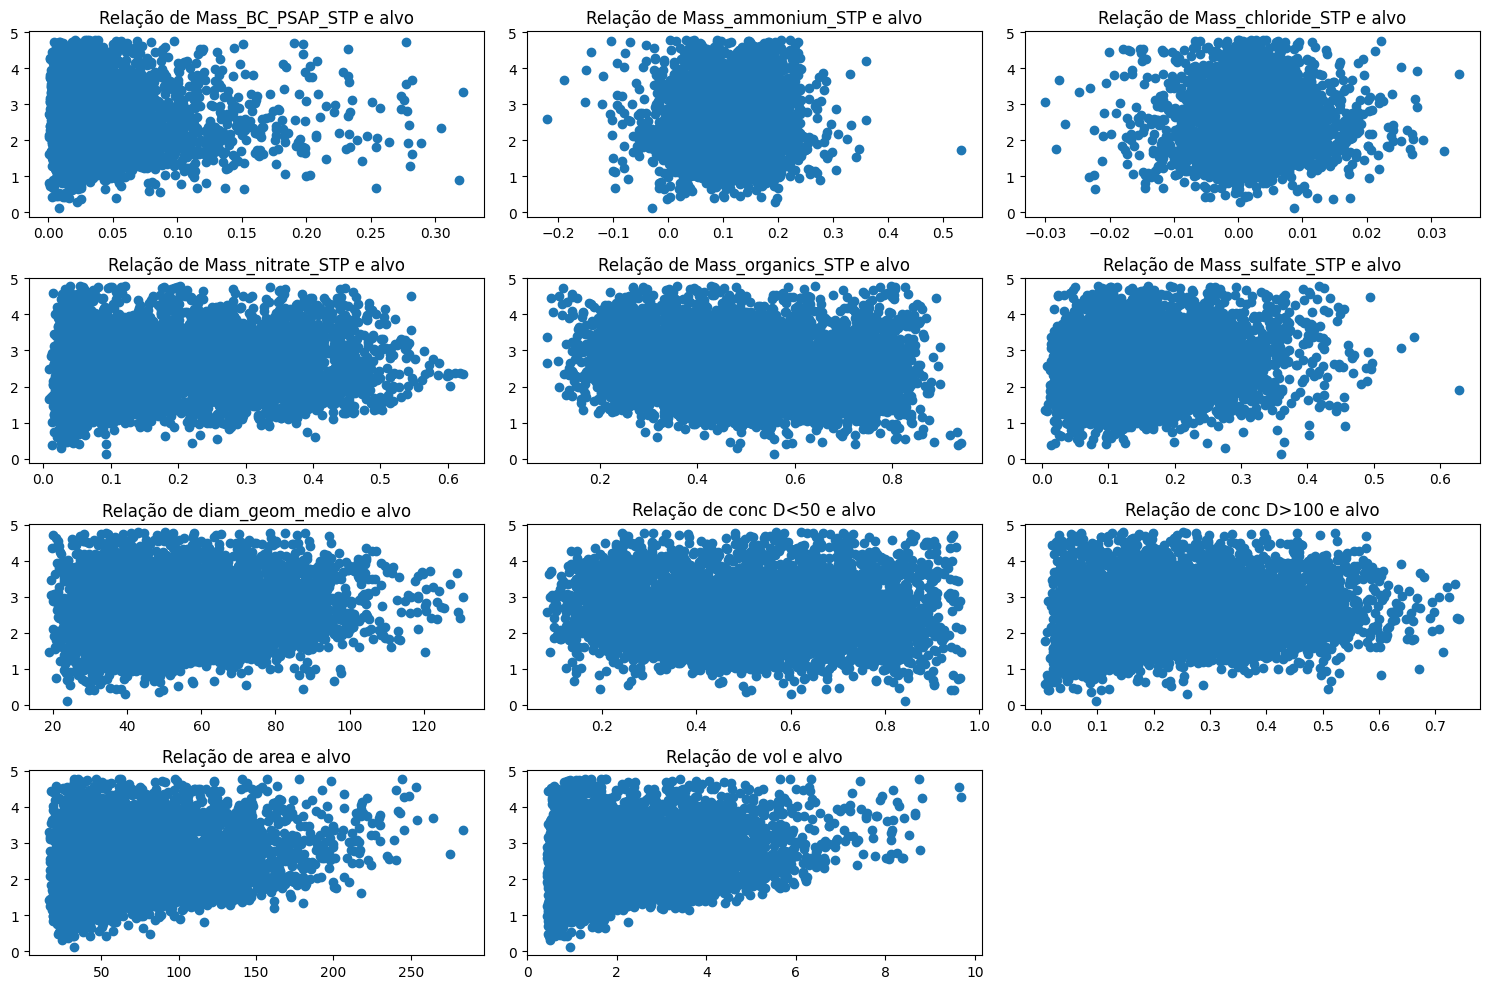

In [ ]:
# Vamos ver como o alvo se relaciona com os preditores - algorítmo análogo ao anterior
num_cols = len(dados_sem_outliers.columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 2.5))

# Fazendo os gráficos em cada posição
clm = 0
for i in range(num_rows):
  for j in range(3):
    if clm < num_cols-1:
      colu_clm = dados_sem_outliers.drop(columns = ['Scattering_Eff']).columns[clm]
      axs[i, j].scatter(dados_sem_outliers[f'{colu_clm}'], dados_sem_outliers['Scattering_Eff']);
      axs[i, j].set_title(f'Relação de {colu_clm} e alvo')
      clm += 1
    else:
      axs[i, j].axis('off')


plt.tight_layout()
plt.show()

Não parece haver uma relação puramente linear entre os diferentes preditores e o alvo. Essa informação será importante para interpretar os resultados da regressão multilinear.

Podemos ver abaixo que a distribuição do alvo náo é muito simétrica. Isso nos convida a fazer uma divisão entre treino e teste que leve em conta esse fator, de modo que possa prever bem todas as regiões de valor do alvo. Vamos implementar essa ideia fazendo uma binagem, pois nosso alvo é uma variável contínua, e usamos a binagem para fazer uma divisão estratificada.

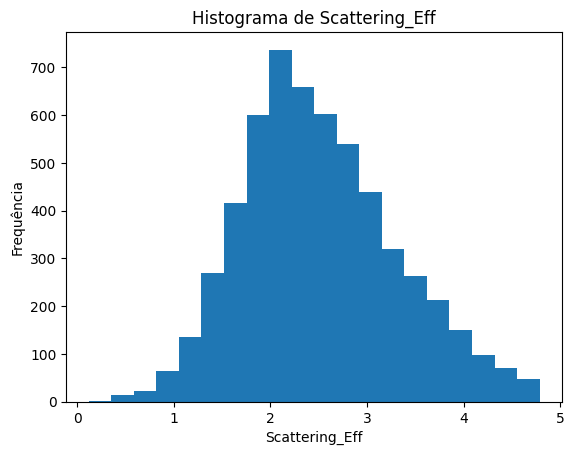

In [ ]:
# Histograma do alvo (para ver melhor)
plt.hist(dados_sem_outliers['Scattering_Eff'], bins=20);
plt.title('Histograma de Scattering_Eff') # Título
plt.xlabel('Scattering_Eff')
plt.ylabel('Frequência')
plt.show()

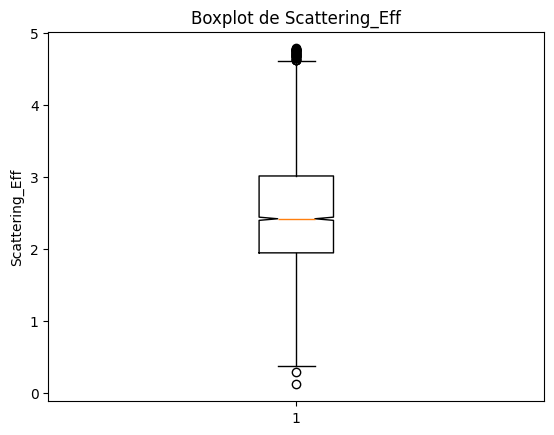

In [ ]:
# Boxplot do alvo
plt.boxplot(dados_sem_outliers['Scattering_Eff'], notch=True)
plt.title('Boxplot de Scattering_Eff') # Título
plt.ylabel('Scattering_Eff')
plt.show()

In [ ]:
# Vamos ver se a distribuição do alvo é mesmo assimétrica
print(dados_sem_outliers['Scattering_Eff'].skew())

0.3945142513728838


Para deixar mais simétrico e fazer a divisão estratificada, vamos primeiro mudar a escala para que os valores do alvo para divisão sejam todos positivos e tomamos log(alvo+1) (somar 1 é para buscar evitar problemas de divergência do log). Assim, podemos fazer os bins com base em ums distribuição com maior simetria.

In [ ]:
# Exemplo: alvo contínuo com valores negativos
y = dados_sem_outliers['Scattering_Eff']  # seu vetor alvo

# Calculamos o shift para deixar os valores do alvo positivos
min_y = y.min()
eps = 1e-6  # pequeno deslocamento de segurança
shift = -min_y + eps  # garante todos positivos

# Aplicando a transformação log(alvo+1) após fazer shift
y_log = np.log1p(y + shift)

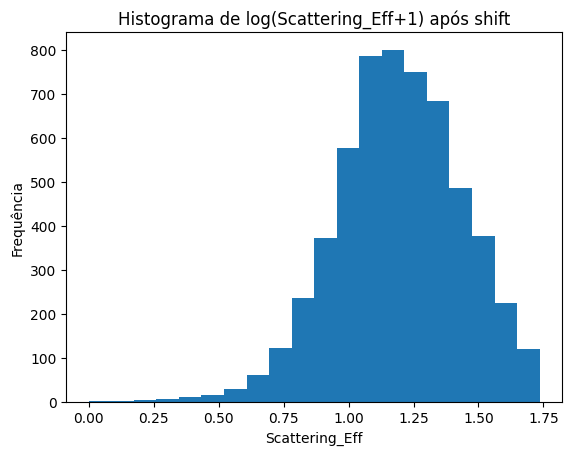

In [ ]:
# Histograma do log(alvo+1) após shift (para ver melhor)
plt.hist((y_log), bins=20);
plt.title('Histograma de log(Scattering_Eff+1) após shift') # Título
plt.xlabel('Scattering_Eff')
plt.ylabel('Frequência')
plt.show()

In [ ]:
print(y_log.skew())

-0.2828861224155483


Abaixo, implementamos a divisão e o escalonamento; a princípio, dividimos em 10 bins, mas planeja-se explorar mais diferentes divisões no futuro. Adotou-se o MinMaxScaler para escalonar tendo em vista que não há uma tendência gaussiana dos preditores para usar StandardScaler por exemplo. Acredita-se que o MinMaxScaler preservará bem as relações internas entre os dados, transformando-os proporcionalmente para cada coluna.

    q  bins_efetivos  min_bin  max_bin  max/min_ratio
0   3              3     1886     1887       1.000530
1   5              5     1131     1132       1.000884
2   7              7      808      809       1.001238
3   9              9      628      629       1.001592
4  11             11      514      515       1.001946
5  13             13      435      436       1.002299
6  15             15      377      378       1.002653
7  17             17      332      333       1.003012
8  19             19      297      298       1.003367

 Melhor valor de q sugerido: 19


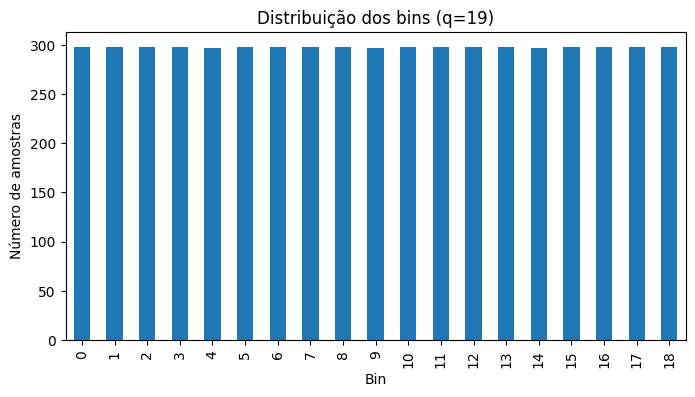


Limites (em escala log):
[9.99999500e-07 8.05807559e-01 8.99233152e-01 9.62335079e-01
 1.01254486e+00 1.04944650e+00 1.08272088e+00 1.11275034e+00
 1.14625723e+00 1.17959065e+00 1.21093757e+00 1.24448520e+00
 1.27914735e+00 1.31481094e+00 1.34923743e+00 1.39023915e+00
 1.43932568e+00 1.50112133e+00 1.57348358e+00 1.73531553e+00]


In [ ]:
# --- Testa até um máximo razoável ---
q_values = np.arange(3, 21, 2)  # de 3 até 20 bins

bin_info = []
for q in q_values:
    y_bins = pd.qcut(y_log, q=q, labels=False, duplicates='drop')
    counts = y_bins.value_counts().sort_index()
    min_bin = counts.min()
    max_bin = counts.max()
    ratio = max_bin / min_bin
    bin_info.append((q, len(counts), min_bin, max_bin, ratio))

bin_df = pd.DataFrame(bin_info, columns=['q', 'bins_efetivos', 'min_bin', 'max_bin', 'max/min_ratio'])
print(bin_df)

# --- Escolhe q mais alto ainda bem balanceado ---
ideal_bins = bin_df.loc[bin_df['max/min_ratio'] < 1.8, 'q']
if not ideal_bins.empty:
    melhor_q = int(ideal_bins.iloc[-1])
else:
    melhor_q = int(bin_df.iloc[0]['q'])

print(f"\n Melhor valor de q sugerido: {melhor_q}")

# --- Visualiza bins ---
y_bins = pd.qcut(y_log, q=melhor_q, labels=False, duplicates='drop')
plt.figure(figsize=(8, 4))
y_bins.value_counts().sort_index().plot(kind='bar')
plt.title(f"Distribuição dos bins (q={melhor_q})")
plt.xlabel("Bin")
plt.ylabel("Número de amostras")
plt.show()

# --- Inspeciona limites dos bins ---
bin_edges = pd.qcut(y_log, q=melhor_q, retbins=True, labels=False)[1]
print("\nLimites (em escala log):")
print(bin_edges)

In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Características
y = dados_sem_outliers['Scattering_Eff'] # Alvo

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y_bins)

In [ ]:
# Verifica quantos bins foram usados e se estão equilibrados
print(f"Bins usados: {len(np.unique(y_bins))}")
print(pd.Series(y_bins).value_counts().sort_index())

Bins usados: 25
Scattering_Eff
0     227
1     226
2     226
3     227
4     226
5     226
6     227
7     226
8     226
9     227
10    226
11    226
12    227
13    226
14    226
15    227
16    226
17    226
18    227
19    226
20    226
21    227
22    226
23    226
24    227
Name: count, dtype: int64


In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

Abaixo, selecionamos os preditores com base na correlação, conforme proposto anteriormente, para otimizar a regressão multilinear mais tarde.

In [ ]:
# Vamos aqui pegar o principal representante de cada conjunto de preditores correlacionados
# Elegemos o principal com base nas correlações com o alvo
# Utilizamos só o conjunto de treino do alvo para isso para evitar vazamento de dados
correlation_threshold = 0.9  # valor de corte para correlação entre preditores

# Voltando para DataFrame para calcular a matriz de correlação
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s  = pd.DataFrame(X_test_s,  columns=X_test.columns)

# Matriz de correlação entre preditores (treino)
corr_matrix = X_train_s.corr().abs()

# Correlação de cada preditor com o alvo
# Função para calcular a correlação de uma coluna com o alvo
def correlacao_com_y(coluna):
    """
    Retorna o coeficiente de correlação de Pearson entre uma coluna (preditora)
    e o vetor de saída y_train.
    """
    return np.corrcoef(coluna, y_train)[0, 1]

# Aplicar a função a cada coluna de X_train_s
corr_with_target = X_train_s.apply(correlacao_com_y).abs()

# Criar um conjunto para armazenar as colunas a remover
to_drop = set()

# Percorrer as colunas e remover uma de cada par correlacionado
for col in corr_matrix.columns:
    if col in to_drop:
        continue
    # Achar colunas altamente correlacionadas com a atual
    high_corr = corr_matrix.index[(corr_matrix[col] > correlation_threshold) & (corr_matrix.index != col)]
    for correlated_col in high_corr:
        # Comparar correlação com y e decidir qual manter
        if corr_with_target[col] >= corr_with_target[correlated_col]:
            to_drop.add(correlated_col)
        else:
            to_drop.add(col)

# Criar os novos DataFrames reduzidos (mantendo coerência entre treino e teste)
X_train_s_reduced = X_train_s.drop(columns=to_drop)
X_test_s_reduced = X_test_s.drop(columns=to_drop)

# Relatório final
print(f"Número de preditores iniciais: {X_train_s.shape[1]}")
print(f"Número de preditores removidos: {len(to_drop)}")
print(f"Número de preditores restantes: {X_train_s_reduced.shape[1]}")
print(f"Colunas removidas: {sorted(to_drop)}")

Número de preditores iniciais: 11
Número de preditores removidos: 3
Número de preditores restantes: 8
Colunas removidas: ['area', 'conc D<50', 'diam_geom_medio']
